In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer

# accessing data library
from statsbombpy import sb

# opening the libraries as DF's
from mplsoccer import Sbopen
parser = Sbopen()

# plotting
import os
import pathlib
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

## Setting Team Palettes

In [212]:
def get_team_colours(team_colour):
    if team_colour == 'ArsenalWFC':
        c1 = '#db0007' #red
        m1 = '#db0007' #red
        c2 = 'white'
        l1 = '#ebb941' #yellow
        c3 = '#e8c044' #yellow
        m2 = '#dab252' #yellow' #9c824a' #gold
        c4 = '#303055' #navy '#273081' #ntwrk rplcmnt 
        l2 = '#303055' #navy'

    elif team_colour == 'ManchesterCityWFC':
        c1 = '#80c2fe' #ntwrk rplcmnt '#97c1e7' #sky blue
        m1 = '#709bc2' #sky blue
        c2 = '#0c346a' #navy
        l1 = '#ffc758' #gold
        c3 = '#ee3124' #red
        m2 = '#ee3124' #red
        c4 = '#030025' #black
        l2 = '#ffc758' #gold

    elif team_colour == 'ChelseaFCW':
        c1 = '#3275d2' #blue
        m1 = '#1c70d1' #blue
        c2 = 'white'
        l1 = '#dba111' #gold
        c3 = '#fad52b' #yellow
        m2 = '#aacbf7' #light blue#yellow
        c4 = '#3b53b0' #blue
        l2 = '#ed1c24' #red '#fcf47e' 

    elif team_colour == 'BirminghamCityWFC':
        c1 = '#4772e5' #blue
        m1 = '#4772e5' #blue
        c2 = 'white'
        l1 = '#ffff00' #yellow
        c3 = '#cc3a31' #red
        m2 = '#cc3a31' #red
        c4 = '#202125' #dark blue
        l2 = '#fcd0dc' #blue

    elif team_colour == 'ReadingWFC':
        c1 = '#1257a7' #blue
        m1 = '#004494' #blue
        c2 = 'white'
        l1 = '#e63450' #red
        c3 = '#e63450' #red
        m2 = '#e23d4c' #f6e0d9' #red
        c4 = '#262e7b'
        l2 = '#f6e0d9' #gold

    elif team_colour == 'BristolCityWFC':
        c1 = '#eb0101' #red
        m1 = '#f71c21' #red
        c2 = 'white'
        l1 = 'white'
        c3 = '#63579b' #purple
        m2 = '#755fcf' #purple
        c4 = 'white'
        l2 = '#76c070' #green

    elif team_colour == 'WestHamUnitedLFC':
        c1 = '#914150' #claret
        m1 = '#914150' #claret
        c2 = '#7bcce6' #blue
        l1 = '#f8d742' #yellow
        c3 = '#7bcce6' #blue
        m2 = '#e1eff5'#edf7fa'
        c4 = '#850322' #claret
        l2 = '#f8d742' #yellow

    elif team_colour == 'LiverpoolWFC':
        c1 = '#e93636' #red
        m1 = '#d51721' #red
        c2 = 'white'
        l1 = '#00a58c' #green
        c3 = '#00937f' #green
        m2 = '#00937f' #green
        c4 = 'black'
        l2 = '#7e20dd' #purple

    elif team_colour == 'BrightonHoveAlbionWFC':
        c1 = '#005daa' #blue
        m1 = '#005daa' #blue
        c2 = 'white'
        l1 = '#fdb913' #yellow
        c3 = '#67a253' #green
        m2 = '#6fae65' #green
        c4 = 'white' #navy
        l2 = '#fdb913' #yellow

    elif team_colour == 'EvertonLFC':
        c1 = '#3d5a9e' #blue
        m1 = '#3155aa' #blue
        c2 = 'white'
        l1 = '#fbe210' #yellow
        c3 = '#eabfd2' #pink
        m2 = '#eabfd2' #pink '#ef6776' #ntwrk rplcmnt 
        c4 = '#383d79' #purple
        l2 = '#ffff33' #yellow 32355c' #dark purple

    elif team_colour == 'YeovilTownLFC':
        c1 = '#4dac26' #green
        m1 = '#faf55e' #yellow
        c2 = '#5c5cad' #blue
        l1 = '#fffa55' #yellow
        c3 = '#e0e073' #greenish
        m2 = '#f5f5a7' #yellow
        c4 = '#5c5cad' #blue
        l2 = '#3da633' #green

    elif team_colour == 'ManchesterUnited':
        c1 = '#e80909' #red
        m1 = '#e80909' #red
        c2 = '#61636d' #grey
        l1 = '#fed545' #yellow
        c3 = '#50a245' #green
        m2 = '#c4c65d' #green
        c4 = '#4f5056' #grey
        l2 = '#f9db57' #yellow

    elif team_colour == 'TottenhamHotspurWomen':
        c1 = '#3e4f91' #blue
        m1 = '#273a7e' #blue
        c2 = 'white'
        l1 = '#f1dc4f' #yellow
        c3 = '#2bc59e' #green
        m2 = '#00c090' #green
        c4 = '#132257' #blue
        l2 = '#f1dc4f' #yellow

    elif team_colour == 'AstonVilla':
        c1 = '#ab2948' #claret
        m1 = '#944054' #claret
        c2 = '#88bbff' #blue
        l1 = '#ffe500' #yellow
        c3 = '#5cab75' #green
        m2 = '#5cab75' #green
        c4 = '#32383b' #black
        l2 = '#de5451' #coral
    
    return c1,m1,c2,l1,c3,m2,c4,l2

# Descriptive Visuals

In [ ]:
season = '2021'
team = 'Aston Villa'

df = pd.read_csv(f'../data/KPIs_{season}.csv')

df = df[df['team']==(team)][['team','shortGK_avg_xkick_lft',
                             'shortGK_avg_ykick_lft','shortGK_avg_xkick_cntr',
                             'shortGK_avg_ykick_cntr','shortGK_avg_xkick_rght',
                             'shortGK_avg_ykick_rght','longGK_avg_xkick_lft',
                             'longGK_avg_ykick_lft','longGK_avg_xkick_cntr',
                             'longGK_avg_ykick_cntr','longGK_avg_xkick_rght',
                             'longGK_avg_ykick_rght','short_avg_x_prog',
                             'fllw_shrt_x_rtrn','long_avg_x_prog','fllw_long_x_rtrn']]

In [ ]:
def GoalKicks(team,season):
    df2 = pd.read_csv(f'../data/matches_ssn{season}.csv')

    df2 = df2.loc[df2["type"] == "Pass"]
    df2 = df2.loc[df2['play_pattern'] == 'From Goal Kick']
    
    def create_GKmatch_possession(row):
        return f"{row['match']},{row['possession']}"
    
    df2['GK_match_possession'] = df2.apply(create_GKmatch_possession, axis=1)
    
    df2 = df2.sort_values(by=['match','timestamp','possession']).reset_index(drop=True)
    
    GKonly = df2[df2['GK_match_possession'].notnull()]
    
    team_gk = GKonly[(GKonly['possession_team']== f'{team}')]
    
    team_gk = team_gk[['possession_team','team','player','position','GK_match_possession','x_start', 'y_start','x_end','y_end']]
    
    team_gk_starts = team_gk.groupby('GK_match_possession').first()
    
    return team_gk_starts.reset_index()

In [ ]:
df2 = GoalKicks(team,season)
df_s = df2[df2['x_end']<25.1]
df_l = df2[df2['x_end']>=25.1]

In [198]:
def short_pass_map(team,season):
    
    df = pd.read_csv(f'../data/KPIs_{season}.csv')

    df = df[df['team']==(team)][['team','shortGK_avg_xkick_lft',
                                 'shortGK_avg_ykick_lft','shortGK_avg_xkick_cntr',
                                 'shortGK_avg_ykick_cntr','shortGK_avg_xkick_rght',
                                 'shortGK_avg_ykick_rght','longGK_avg_xkick_lft',
                                 'longGK_avg_ykick_lft','longGK_avg_xkick_cntr',
                                 'longGK_avg_ykick_cntr','longGK_avg_xkick_rght',
                                 'longGK_avg_ykick_rght','short_avg_x_prog',
                                 'fllw_shrt_x_rtrn','long_avg_x_prog','fllw_long_x_rtrn']]

    def GoalKicks(team,season):
        df2 = pd.read_csv(f'../data/matches_ssn{season}.csv')

        df2 = df2.loc[df2["type"] == "Pass"]
        df2 = df2.loc[df2['play_pattern'] == 'From Goal Kick']

        def create_GKmatch_possession(row):
            return f"{row['match']},{row['possession']}"

        df2['GK_match_possession'] = df2.apply(create_GKmatch_possession, axis=1)

        df2 = df2.sort_values(by=['match','timestamp','possession']).reset_index(drop=True)

        GKonly = df2[df2['GK_match_possession'].notnull()]

        team_gk = GKonly[(GKonly['possession_team']== f'{team}')]

        team_gk = team_gk[['possession_team','team','player','position',
                           'GK_match_possession','x_start', 'y_start','x_end','y_end']]

        team_gk_starts = team_gk.groupby('GK_match_possession').first()

        return team_gk_starts.reset_index()

    df2 = GoalKicks(team,season)
    df_s = df2[df2['x_end']<25.1]
    df_l = df2[df2['x_end']>=25.1]

    team_colour = team.replace(' ', '').replace('&', '')
    get_team_colours(team_colour)
    c1 = get_team_colours(team_colour)[0]
    m1 = get_team_colours(team_colour)[1]
    c2 = get_team_colours(team_colour)[2]
    l1 = get_team_colours(team_colour)[3]
    c3 = get_team_colours(team_colour)[4]
    m2 = get_team_colours(team_colour)[5]
    c4 = get_team_colours(team_colour)[6]
    l2 = get_team_colours(team_colour)[7]
        
    p1 = '#fcf7f1'
    p2 = 'grass'
    pl1 = '#646260'

    ## YARDS FOR / AGAINST MARKERS
    x1 = float(df['short_avg_x_prog'])
    x2 = float(df['fllw_shrt_x_rtrn'])
    x3 = float(df['long_avg_x_prog'])
    x4 = float(df['fllw_long_x_rtrn'])


    ## DRAWING THE PITCH

    pitch = Pitch(pitch_color=p1, line_color=pl1, stripe=False,
                  linestyle='-', corner_arcs = True, positional=False, line_zorder=3)

    fig, ax = pitch.draw(figsize=[12, 8])

    ########################################################################

    ###### SHORT START AVG GAINS ######
    ax.fill_between([0, x1], 0, 80, color=c1, alpha=0.6, zorder=1)

    ###### setting-up the first short markers ######
    y_shrts = list(range(2, 79, 8))
    x_shrts = range(2, int(x1), 4)

    for y_Smarker in y_shrts:
        ax.scatter(x=x_shrts, y=[y_Smarker] * len(x_shrts), marker='>', color=m1, s=400, alpha=0.25, zorder=2)

    ###### setting-up the second long markers ######
    y_shrts2 = list(range(6, 80, 8))
    x_shrts2 = range(2, int(x2), 4)

    for y_Smarker2 in y_shrts2:
        ax.scatter(x=x_shrts2, y=[y_Smarker2] * len(x_shrts2), marker='>', color=m1, s=400, alpha=0.25, zorder=2)

    ###### setting-up the LONG return markers ######
    y_Srtrns = list(range(6, 80, 8))
    x_Srtrns = range(int(x2)+2, int(x1), 4)

    for y_Srtrn in y_Srtrns:
        ax.scatter(x=x_Srtrns, y=[y_Srtrn] * len(x_Srtrns), marker='<', color=c2, s=400, alpha=0.8, zorder=3)     

    ###### Final OVERALL SHORT GAINS LINE ######
    ax.vlines(x=x1, ymin=0.1, ymax=79.9, color=l1, linestyle='-', linewidth=5, alpha=1, zorder=4)
    ax.vlines(x=x2, ymin=0.1, ymax=79.9, color=l1, linestyle='--', linewidth=5, alpha=1, zorder=4)

    ########################################################################

    ## DRAW PASSES

    # ALL GK'S
    pitch.lines(df_s['x_start'], df_s['y_start'], df_s['x_end'], df_s['y_end'],zorder=4,
                color=pl1, ax=ax, lw=3, comet=True,  alpha_start=0.1, alpha_end=1, alpha=0.3, transparent=True)

    # Short Left GK
    pitch.lines(5.6, 36, df['shortGK_avg_xkick_lft'], df['shortGK_avg_ykick_lft'],zorder=6,
                color=l1, ax=ax, lw=6, comet=True,  alpha_start=0.1, alpha_end=1, transparent=True)
    pitch.scatter(df['shortGK_avg_xkick_lft'], df['shortGK_avg_ykick_lft'],
                  color=l1, ax=ax, s=150, zorder=6)

    # Short CNTR GK
    pitch.lines(5.6, 40, df['shortGK_avg_xkick_cntr'], df['shortGK_avg_ykick_cntr'],zorder=6,
                color=l1, ax=ax, lw=6, comet=True,  alpha_start=0.1, alpha_end=1, transparent=True)
    pitch.scatter(df['shortGK_avg_xkick_cntr'], df['shortGK_avg_ykick_cntr'],
                  color=l1, ax=ax, s=150, zorder=6)

    # Short RIGHT GK
    pitch.lines(5.6, 44, df['shortGK_avg_xkick_rght'], df['shortGK_avg_ykick_rght'],zorder=6,
                color=l1, ax=ax, lw=6, comet=True,  alpha_start=0.1, alpha_end=1, transparent=True)
    pitch.scatter(df['shortGK_avg_xkick_rght'], df['shortGK_avg_ykick_rght'],
                  color=l1, ax=ax, s=150, zorder=6);
    
    plt.savefig(f'../pitch_maps/short_gains/short_gains_{team}_{season}_new.png');
#    plt.show();

In [193]:
def long_pass_map(team,season):
    
    df = pd.read_csv(f'../data/KPIs_{season}.csv')

    df = df[df['team']==(team)][['team','shortGK_avg_xkick_lft',
                                 'shortGK_avg_ykick_lft','shortGK_avg_xkick_cntr',
                                 'shortGK_avg_ykick_cntr','shortGK_avg_xkick_rght',
                                 'shortGK_avg_ykick_rght','longGK_avg_xkick_lft',
                                 'longGK_avg_ykick_lft','longGK_avg_xkick_cntr',
                                 'longGK_avg_ykick_cntr','longGK_avg_xkick_rght',
                                 'longGK_avg_ykick_rght','short_avg_x_prog',
                                 'fllw_shrt_x_rtrn','long_avg_x_prog','fllw_long_x_rtrn']]

    def GoalKicks(team,season):
        df2 = pd.read_csv(f'../data/matches_ssn{season}.csv')

        df2 = df2.loc[df2["type"] == "Pass"]
        df2 = df2.loc[df2['play_pattern'] == 'From Goal Kick']

        def create_GKmatch_possession(row):
            return f"{row['match']},{row['possession']}"

        df2['GK_match_possession'] = df2.apply(create_GKmatch_possession, axis=1)

        df2 = df2.sort_values(by=['match','timestamp','possession']).reset_index(drop=True)

        GKonly = df2[df2['GK_match_possession'].notnull()]

        team_gk = GKonly[(GKonly['possession_team']== f'{team}')]

        team_gk = team_gk[['possession_team','team','player','position',
                           'GK_match_possession','x_start', 'y_start','x_end','y_end']]

        team_gk_starts = team_gk.groupby('GK_match_possession').first()

        return team_gk_starts.reset_index()

    df2 = GoalKicks(team,season)
    df_s = df2[df2['x_end']<25.1]
    df_l = df2[df2['x_end']>=25.1]

    team_colour = team.replace(' ', '').replace('&', '')
    get_team_colours(team_colour)
    c1 = get_team_colours(team_colour)[0]
    m1 = get_team_colours(team_colour)[1]
    c2 = get_team_colours(team_colour)[2]
    l1 = get_team_colours(team_colour)[3]
    c3 = get_team_colours(team_colour)[4]
    m2 = get_team_colours(team_colour)[5]
    c4 = get_team_colours(team_colour)[6]
    l2 = get_team_colours(team_colour)[7]

## COLOUR PALETTE
#c1 = '#952645'
#c2 = '#9bbade'
    #c3 = '#f9e34c'

    p1 = '#fcf7f1'
    p2 = 'grass'
    pl1 = '#646260'


    ## YARDS FOR / AGAINST MARKERS
    x1 = float(df['short_avg_x_prog'])
    x2 = float(df['fllw_shrt_x_rtrn'])
    x3 = float(df['long_avg_x_prog'])
    x4 = float(df['fllw_long_x_rtrn'])


    ## DRAWING THE PITCH

    pitch = Pitch(pitch_color=p1, line_color=pl1, stripe=False, 
                  linestyle='-', corner_arcs = True, positional=False, line_zorder=3)

    fig, ax = pitch.draw(figsize=[12, 8])

    ###### LONG START AVG GAINS ######
    ax.fill_between([0, x3], 0, 80, color=c3, alpha=0.7, zorder=1)

    ###### setting-up the first long markers ######
    y_lngs = list(range(2, 79, 8))
    x_lngs = range(3, int(x3), 4)

    for y_Lmarker in y_lngs:
        ax.scatter(x=x_lngs, y=[y_Lmarker] * len(x_lngs), marker='>', color=m2, s=400, alpha=0.8, zorder=2)

    ###### setting-up the second long markers ######
    y_lngs2 = list(range(6, 80, 8))
    x_lngs2 = range(3, int(x4), 4)

    for y_Lmarker2 in y_lngs2:
        ax.scatter(x=x_lngs2, y=[y_Lmarker2] * len(x_lngs2), marker='>', color=m2, s=400, alpha=0.8, zorder=2)

    ###### setting-up the LONG return markers ######
    y_Lrtrns = list(range(6, 80, 8))
    x_Lrtrns = range(int(x4)+2, int(x3), 4)

    for y_Lrtrn in y_Lrtrns:
        ax.scatter(x=x_Lrtrns, y=[y_Lrtrn] * len(x_Lrtrns), marker='<', color=c4, s=400, alpha=0.5, zorder=4) 

    ###### Final OVERALL LONG GAINS LINE ######
    ax.vlines(x=x3, ymin=0.1, ymax=79.9, color=c4, linestyle='-', linewidth=5, zorder=5)
    ax.vlines(x=x4, ymin=0.1, ymax=79.9, color=c4, linestyle='--', linewidth=5, zorder=5)

    ########################################################################
    ## DRAW PASSES

    # ALL LONG GK'S
    pitch.lines(df_l['x_start'], df_l['y_start'], df_l['x_end'], df_l['y_end'],zorder=3,
                color=pl1, ax=ax, lw=3, comet=True,  alpha_start=0.1, alpha_end=1, alpha=0.25, 
                transparent=True)

    # Long Left GK
    pitch.lines(5.6, 36, df['longGK_avg_xkick_lft'], df['longGK_avg_ykick_lft'],zorder=6,
                color=l2, ax=ax, lw=5, comet=True, alpha_start=0.1, alpha_end=1, transparent=True)
    pitch.scatter(df['longGK_avg_xkick_lft'], df['longGK_avg_ykick_lft'],
                  color=l2, ax=ax, s=300, zorder=6)

    # Long CNTR GK
    pitch.lines(5.6, 40, df['longGK_avg_xkick_cntr'], df['longGK_avg_ykick_cntr'],zorder=6,
                color=l2, ax=ax, lw=5, comet=True, alpha_start=0.1, alpha_end=1, transparent=True)
    pitch.scatter(df['longGK_avg_xkick_cntr'], df['longGK_avg_ykick_cntr'],
                  color=l2, ax=ax, s=300, zorder=6)

    # Long RIGHT GK
    pitch.lines(5.6, 44, df['longGK_avg_xkick_rght'], df['longGK_avg_ykick_rght'],zorder=6,
                color=l2, ax=ax, lw=5, comet=True, alpha_start=0.1, alpha_end=1, transparent=True)
    pitch.scatter(df['longGK_avg_xkick_rght'], df['longGK_avg_ykick_rght'],
                  color=l2, ax=ax, s=300, zorder=6);

    plt.savefig(f'../pitch_maps/long_gains/long_gains_{team}_{season}.png');
#    plt.show();

# <ins>Passing Networks<ins>

### Each Team's Most Frequent Lineups Throughout Each Season

In [10]:
def GK_chains(team,season):
    df2 = pd.read_csv(f'../data/matches_ssn{season}.csv')

    df2 = df2.loc[df2["type"] == "Pass"]
    df2 = df2.loc[df2['play_pattern'] == 'From Goal Kick']
    
    def create_GKmatch_possession(row):
        return f"{row['match']},{row['possession']}"
    
    df2['GK_match_possession'] = df2.apply(create_GKmatch_possession, axis=1)
    
    df2 = df2.sort_values(by=['match','timestamp','possession']).reset_index(drop=True)
    
    GKonly = df2[df2['GK_match_possession'].notnull()]
    
    team_gk = GKonly[(GKonly['possession_team']== f'{team}')]
    
    team_gk = team_gk[['GK_match_possession','match','possession',
                       'type','timestamp','possession_team','team',
                       'player','position','pass_recipient','pass_outcome',
                       'x_start', 'y_start','x_end','y_end']]
    
    player_list = lineup(team, season)['player'].tolist()
    player_list = player_list['player'].tolist()
    
    team_gk = team_gk[team_gk['player'].isin(player_list)]
    team_gk = team_gk[team_gk['pass_outcome'].isnull()]
    
    return team_gk.reset_index(drop = True)

## <ins>Only Looking At GoalKick Chains<ins>

In [5]:
def lineup(team, season):
    df3 = pd.read_csv(f'../data/matches_ssn{season}.csv')
    lineup = df3[(df3['team']==team)&
                 (df3['player'].notnull())].groupby(
        ['season','team','player','position']).count().sort_values(by='match',ascending=False).reset_index()
    lineup = lineup.drop_duplicates('player')
    lineup = lineup.drop_duplicates('position')[['season','team',
                                                 'player',
                                                 'position']
                                               ].head(11).reset_index(drop=True)
    return lineup

### Short Pass Network Test

In [80]:
def short_network_pitch(team,season):
    
    def short_pass_ntwrks(team,season):
        df2 = pd.read_csv(f'../data/matches_ssn{season}.csv')

        def create_GKmatch_possession(row):
            if row['play_pattern'] == 'From Goal Kick':
                return f"{row['match']},{row['possession']}"
            else:
                return None
        df2['GK_match_possession'] = df2.apply(create_GKmatch_possession, axis=1)

        gk_only = df2[df2['GK_match_possession'].notnull()]
        team_gk = gk_only[gk_only['possession_team']== f'{team}']
        team_gk_starts = team_gk.groupby('GK_match_possession').first()

        
        def lineup(team, season):
            df3 = pd.read_csv(f'../data/matches_ssn{season}.csv')
            lineup = df3[(df3['team']==team)&
                         (df3['player'].notnull())].groupby(
                ['season','team','player',
                 'position']).count().sort_values(by='match',ascending=False).reset_index()
            lineup = lineup.drop_duplicates('player')
            lineup = lineup.drop_duplicates('position')[['season','team',
                                                         'player',
                                                         'position']].head(11).reset_index(drop=True)
            return lineup
        
        player_list = lineup(team,season)
        player_list = player_list['player'].tolist()

        mask = team_gk.groupby('GK_match_possession').first()['x_end']<25.1
        team_gk['short_GK_start'] = mask[team_gk['GK_match_possession']].values

        team_gk_shrt_chains = team_gk[team_gk['short_GK_start']==True]

        team_gk_shrt_chains = team_gk_shrt_chains[team_gk_shrt_chains['team']==team]

        team_gk_shrt_chains = team_gk_shrt_chains[team_gk_shrt_chains['type'] == 'Pass']

        team_gk_shrt_chains = team_gk_shrt_chains[team_gk_shrt_chains['pass_outcome'].isnull()]

        team_gk_shrt_chains = team_gk_shrt_chains[['season','GK_match_possession','timestamp',
                                                   'team','play_pattern','player','position',
                                                   'pass_recipient','pass_outcome','x_start',
                                                   'y_start','x_end',
                                                   'y_end']].sort_values(by=['GK_match_possession','timestamp'])
        return team_gk_shrt_chains

    
    short_team_ntwrk = short_pass_ntwrks(team,season)

    avg_loctaions_short = short_team_ntwrk.groupby(['player']).agg(
        {'x_start':['mean'], 'y_start':['mean','count']})
    avg_loctaions_short.columns = ['x_start','y_start','count']

    pass_between_short = short_team_ntwrk.groupby(['player','pass_recipient']).season.count().reset_index()
    pass_between_short.rename({'season': 'pass_count'},axis='columns',inplace=True)

    pass_between_short = pass_between_short.merge(avg_loctaions_short, 
                                                  left_on = 'player',right_index = True)

    pass_between_short = pass_between_short.merge(avg_loctaions_short,
                                                left_on = 'pass_recipient',
                                                right_index = True, suffixes=['','_end'])

    pass_between_short.rename({'x_start_end': 'x_end',
                         'y_start_end': 'y_end'},axis='columns',inplace=True)
    
    pass_between_short.fillna(0, inplace=True)
    
    player_list = lineup(team,season)
    player_list = player_list['player'].tolist()

    pass_between_short = pass_between_short[pass_between_short['player'].isin
                                            (player_list)].sort_values(by='pass_count',ascending=False)

    pass_between_short = pass_between_short[pass_between_short['pass_count']>2]


    pass_count_short = pass_between_short[['pass_count']].values.reshape(-1, 1)
    
    # Apply Normalizer
    scaler = MinMaxScaler()
    scaled_passes_short = scaler.fit_transform(pass_count_short)

    ## DRAWING THE PITCH FOR SHORT

    def sigmoid_compression(x):
        return 1 / (1 + np.exp(-x))

    Sstrength = sigmoid_compression(scaled_passes_short)
    
    #Sstrength = scaled_passes_short

    p1 = '#fcf7f1'
    pl1 = '#646260'

    team_colour = team.replace(' ', '').replace('&', '')
    get_team_colours(team_colour)
    c1 = get_team_colours(team_colour)[0]
    m1 = get_team_colours(team_colour)[1]
    c2 = get_team_colours(team_colour)[2]
    l1 = get_team_colours(team_colour)[3]
    c3 = get_team_colours(team_colour)[4]
    m2 = get_team_colours(team_colour)[5]
    c4 = get_team_colours(team_colour)[6]
    l2 = get_team_colours(team_colour)[7]

    pitch = Pitch(pitch_color=p1, line_color=pl1, stripe=False,
                  linestyle='-', corner_arcs = True, positional=False, line_zorder=3)

    #pitch = Pitch(pitch_color='grass', line_color='white',
    #              stripe=True, corner_arcs = True, goal_alpha=1, line_zorder=2)

    fig, ax = pitch.draw(figsize=[12, 8])

    pitch.arrows(pass_between_short['x_start'], pass_between_short['y_start'],
                 pass_between_short['x_end'], pass_between_short['y_end'],
                 width = 4, headwidth = 2, color=c1, alpha = Sstrength, 
                 zorder=2, ax=ax)

    pitch.scatter(pass_between_short['x_start'], pass_between_short['y_start'],
                  color='none', s=100, edgecolor=c1, linewidth=2.5, zorder=3, ax=ax);

    plt.savefig(f'../pitch_maps/short_network/short_network_{team}_{season}.png');
#    plt.show();

## Long Goal Kick Starts

In [143]:
def long_network_pitch(team,season):
    
    def long_pass_ntwrks(team,season):
        df2 = pd.read_csv(f'../data/matches_ssn{season}.csv')

        def create_GKmatch_possession(row):
            if row['play_pattern'] == 'From Goal Kick':
                return f"{row['match']},{row['possession']}"
            else:
                return None
        df2['GK_match_possession'] = df2.apply(create_GKmatch_possession, axis=1)

        gk_only = df2[df2['GK_match_possession'].notnull()]
        team_gk = gk_only[gk_only['possession_team']== f'{team}']
        team_gk_starts = team_gk.groupby('GK_match_possession').first() 

        
        def lineup(team, season):
            df3 = pd.read_csv(f'../data/matches_ssn{season}.csv')
            lineup = df3[(df3['team']==team)&
                         (df3['player'].notnull())].groupby(
                ['season','team','player','position']).count().sort_values(by='match',
                                                                           ascending=False).reset_index()
            lineup = lineup.drop_duplicates('player')
            lineup = lineup.drop_duplicates('position')[['season','team',
                                                         'player',
                                                         'position']].head(11).reset_index(drop=True)
            return lineup        

        player_list = lineup(team,season)
        player_list = player_list['player'].tolist()

        mask = team_gk.groupby('GK_match_possession').first()['x_end']>=25.1
        team_gk['short_GK_start'] = mask[team_gk['GK_match_possession']].values

        team_gk_lng_chains = team_gk[team_gk['short_GK_start']==True]

        team_gk_lng_chains = team_gk_lng_chains[team_gk_lng_chains['team']==team]

        team_gk_lng_chains = team_gk_lng_chains[team_gk_lng_chains['type'] == 'Pass']

        team_gk_lng_chains = team_gk_lng_chains[team_gk_lng_chains['pass_outcome'].isnull()]

        team_gk_lng_chains = team_gk_lng_chains[['season','GK_match_possession','timestamp',
                                                   'team','play_pattern','player','position',
                                                   'pass_recipient','pass_outcome','x_start',
                                                   'y_start','x_end',
                                                   'y_end']].sort_values(by=['GK_match_possession','timestamp'])
        return team_gk_lng_chains

    
    long_team_ntwrk = long_pass_ntwrks(team,season)

    avg_loctaions_long = long_team_ntwrk.groupby(['player']).agg(
        {'x_start':['mean'], 'y_start':['mean','count']})
    avg_loctaions_long.columns = ['x_start','y_start','count']

    pass_between_long = long_team_ntwrk.groupby(['player','pass_recipient']).season.count().reset_index()
    pass_between_long.rename({'season': 'pass_count'},axis='columns',inplace=True)

    pass_between_long = pass_between_long.merge(avg_loctaions_long, 
                                                  left_on = 'player',right_index = True)

    pass_between_long = pass_between_long.merge(avg_loctaions_long,
                                                left_on = 'pass_recipient',
                                                right_index = True, suffixes=['','_end'])

    pass_between_long.rename({'x_start_end': 'x_end',
                         'y_start_end': 'y_end'},axis='columns',inplace=True)

    pass_between_long.fillna(0, inplace=True)
    
    player_list = lineup(team,season)
    player_list = player_list['player'].tolist()

    pass_between_long = pass_between_long[pass_between_long['player'].isin
                                            (player_list)].sort_values(by='pass_count',ascending=False)

    pass_between_long = pass_between_long[pass_between_long['pass_count']>2]


    pass_count_long = pass_between_long[['pass_count']].values.reshape(-1, 1)    
    
    # Apply Normalizer
    scaler = MinMaxScaler()
    scaled_passes_long = scaler.fit_transform(pass_count_long)

    ## DRAWING THE PITCH FOR LONG

    def sigmoid_compression(x):
        return 1 / (1 + np.exp(-x))

    Lstrength = sigmoid_compression(scaled_passes_long)

    p1 = '#fcf7f1'
    pl1 = '#646260'

    team_colour = team.replace(' ', '').replace('&', '')
    get_team_colours(team_colour)
    c1 = get_team_colours(team_colour)[0]
    m1 = get_team_colours(team_colour)[1]
    c2 = get_team_colours(team_colour)[2]
    l1 = get_team_colours(team_colour)[3]
    c3 = get_team_colours(team_colour)[4]
    m2 = get_team_colours(team_colour)[5]
    c4 = get_team_colours(team_colour)[6]
    l2 = get_team_colours(team_colour)[7]

    pitch = Pitch(pitch_color=p1, line_color=pl1, stripe=False,
                  linestyle='-', corner_arcs = True, positional=False, line_zorder=3)

    #pitch = Pitch(pitch_color='grass', line_color='white',
    #              stripe=True, corner_arcs = True, goal_alpha=1, line_zorder=2)

    fig, ax = pitch.draw(figsize=[12, 8])

    pitch.arrows(pass_between_long['x_start'], pass_between_long['y_start'],
                 pass_between_long['x_end'], pass_between_long['y_end'],
                 width = 4, headwidth = 2, color=m2, alpha = Lstrength,
                 zorder=4, ax=ax)

    pitch.scatter(pass_between_long['x_start'], pass_between_long['y_start'],
                  color='none', s=100, edgecolor=m2, linewidth=2.5, zorder=2, ax=ax);

    plt.savefig(f'../pitch_maps/long_network/long_network_{team}_{season}.png');
#    plt.show();

In [77]:
ssn1920

['Bristol City WFC',
 'Brighton & Hove Albion WFC',
 'Manchester City WFC',
 'Manchester United',
 'Chelsea FCW',
 'Tottenham Hotspur Women',
 'Liverpool WFC',
 'Reading WFC',
 'Birmingham City WFC',
 'Everton LFC',
 'Arsenal WFC',
 'West Ham United LFC']

In [61]:
ssn1819 = pd.read_csv(f'../data/matches_ssn1819.csv')
ssn1819 = ssn1819['team'].unique().tolist()

ssn1920 = pd.read_csv(f'../data/matches_ssn1920.csv')
ssn1920 = ssn1920['team'].unique().tolist()

ssn2021 = pd.read_csv(f'../data/matches_ssn2021.csv')
ssn2021 = ssn2021['team'].unique().tolist()

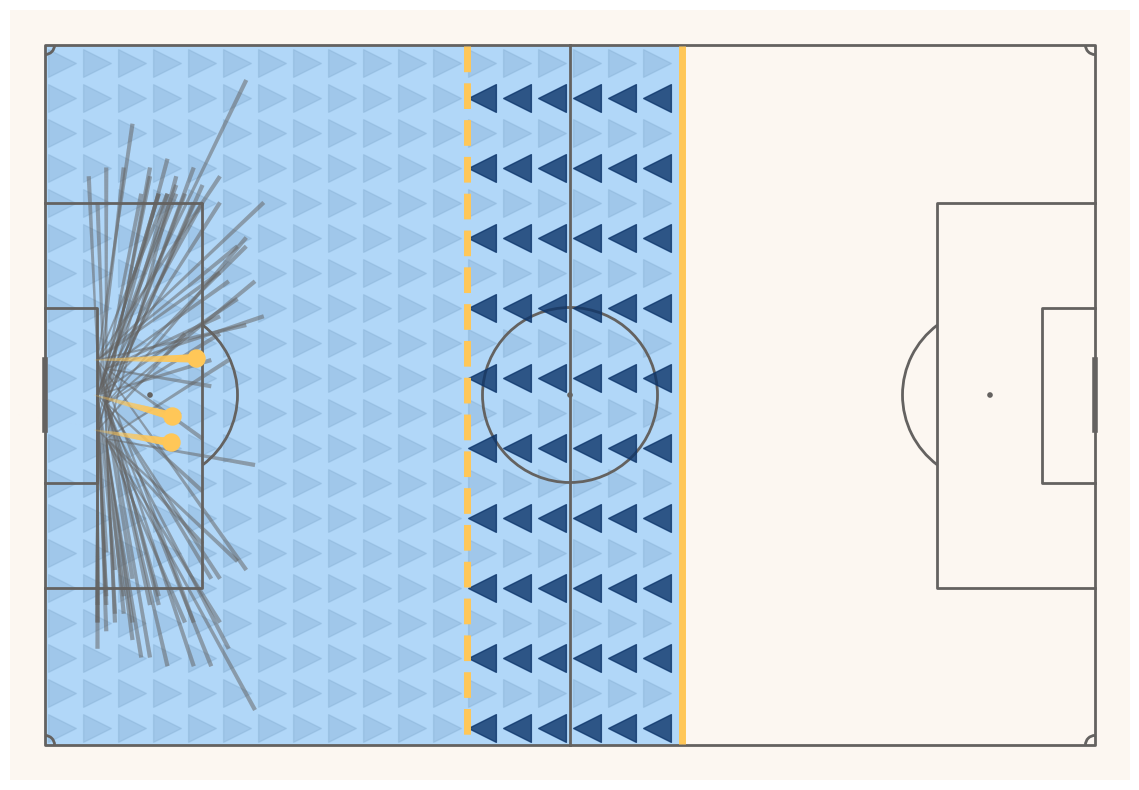

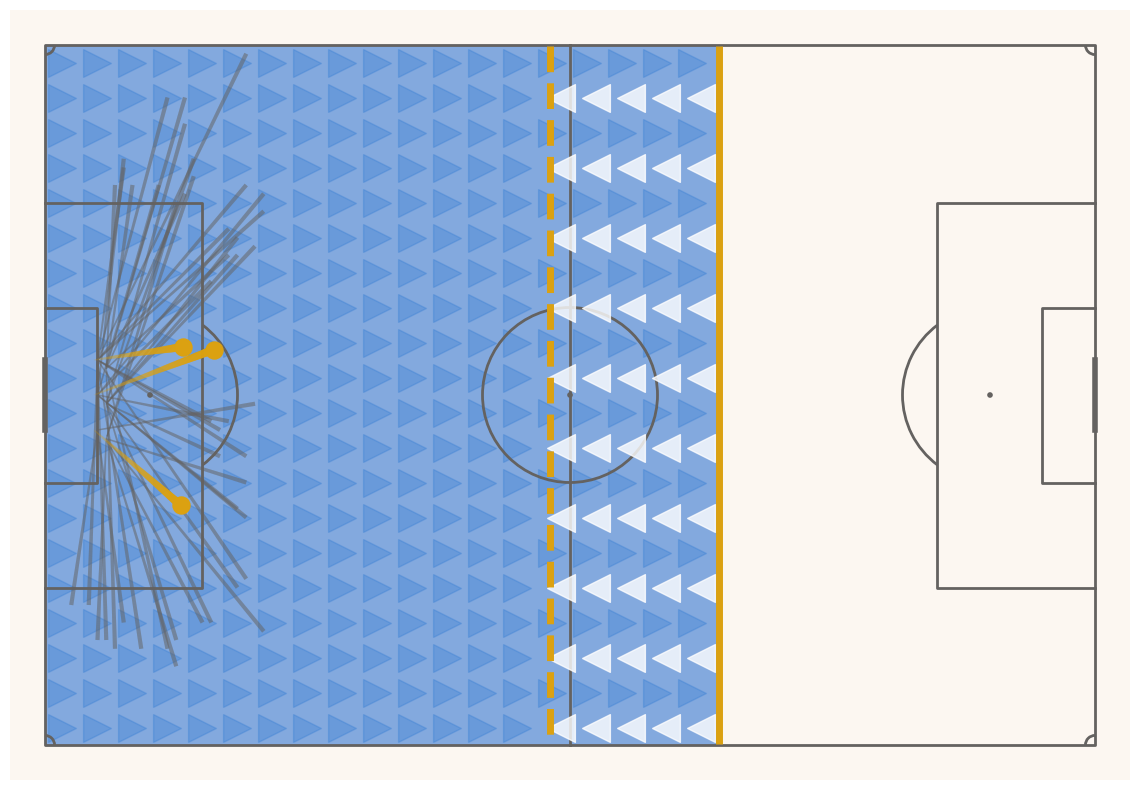

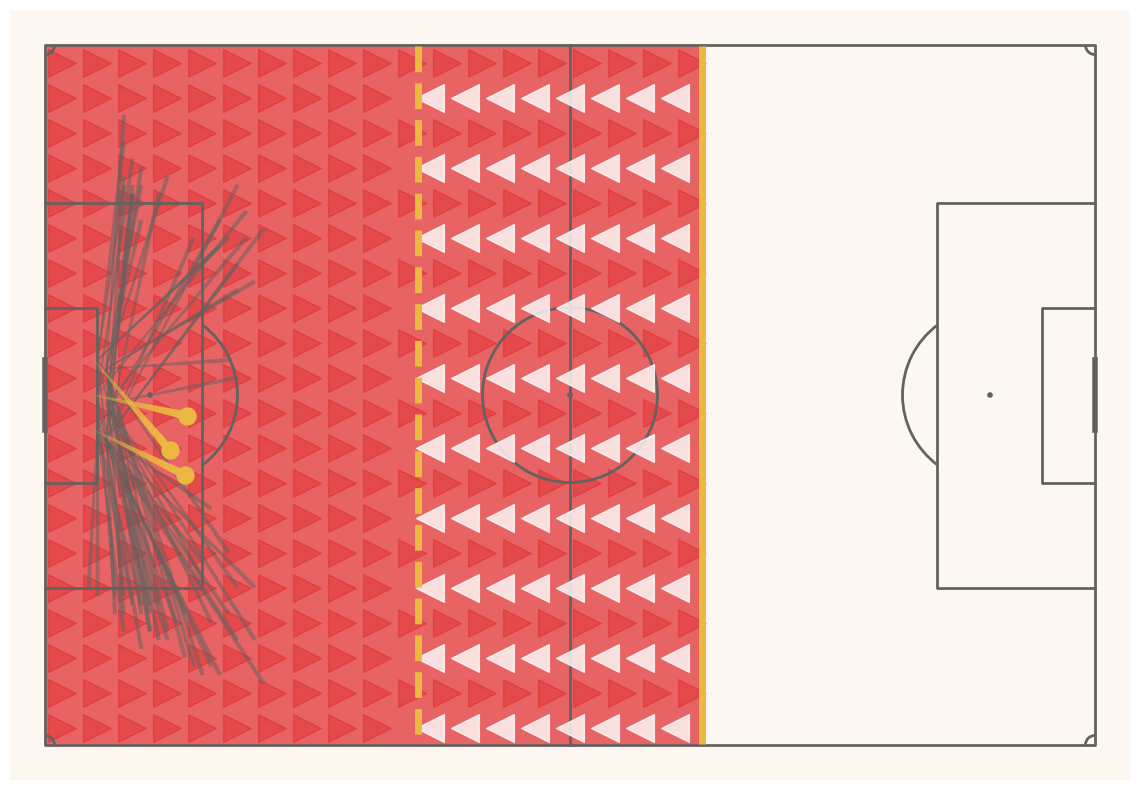

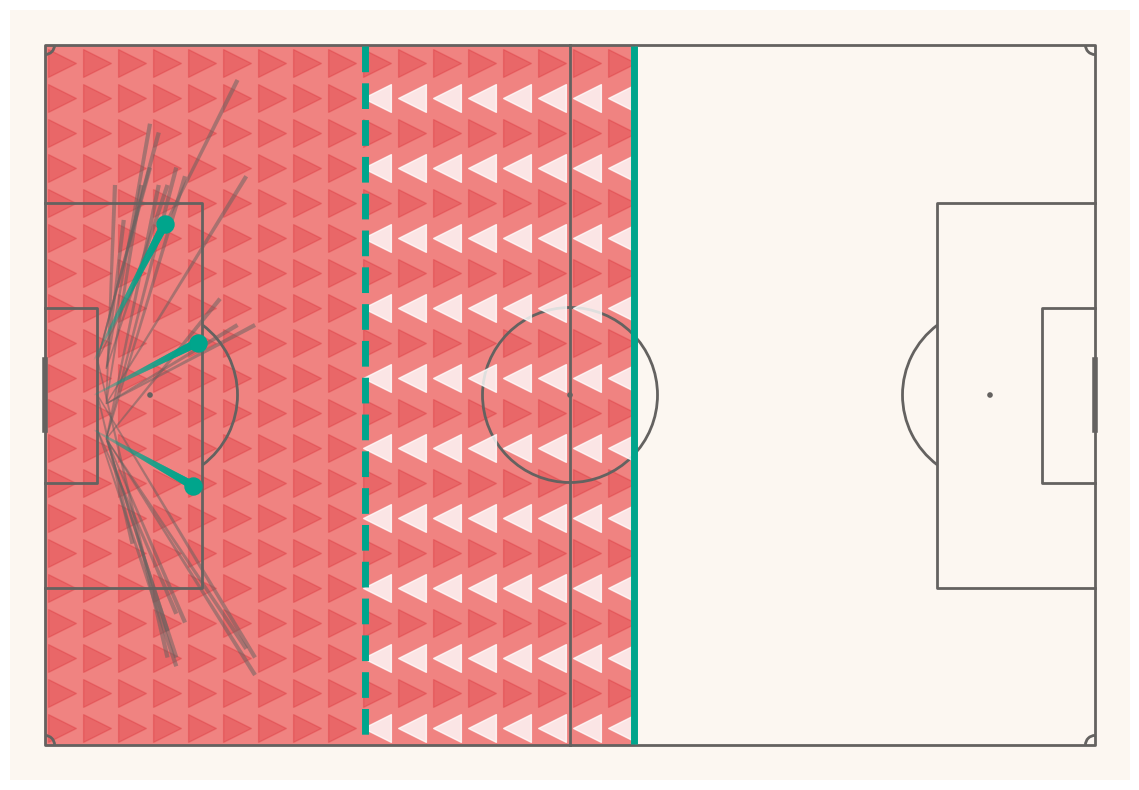

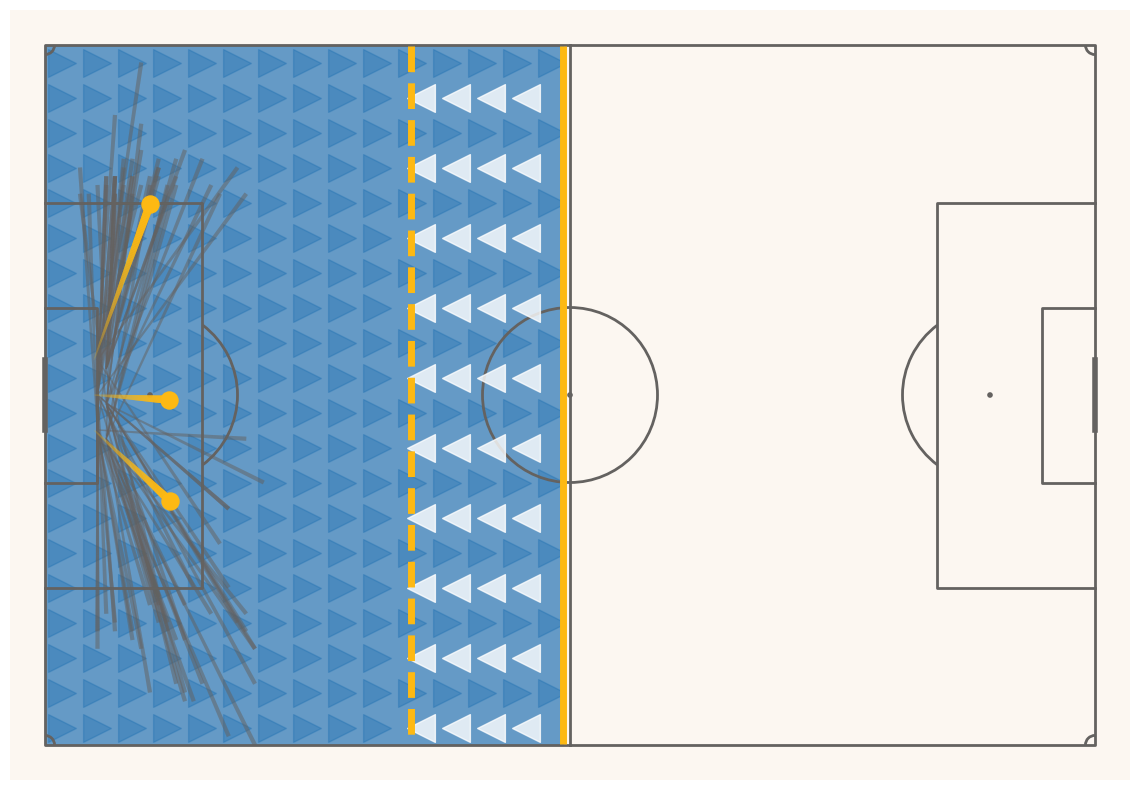

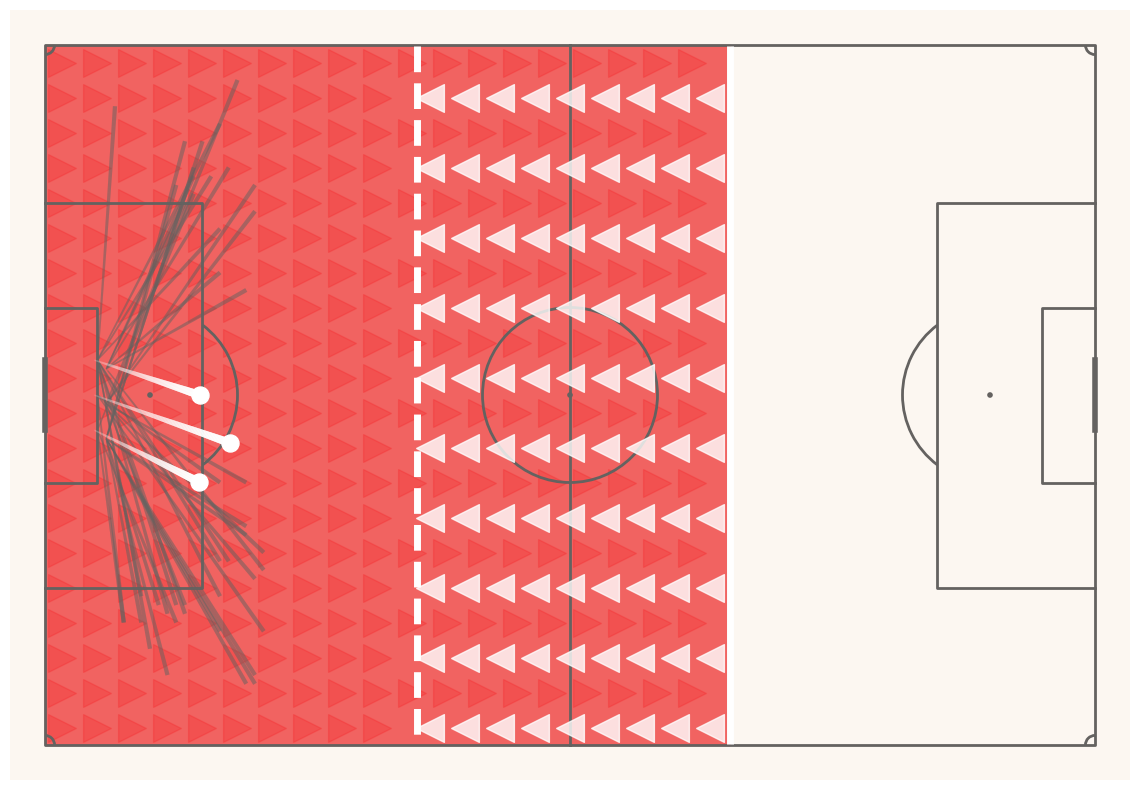

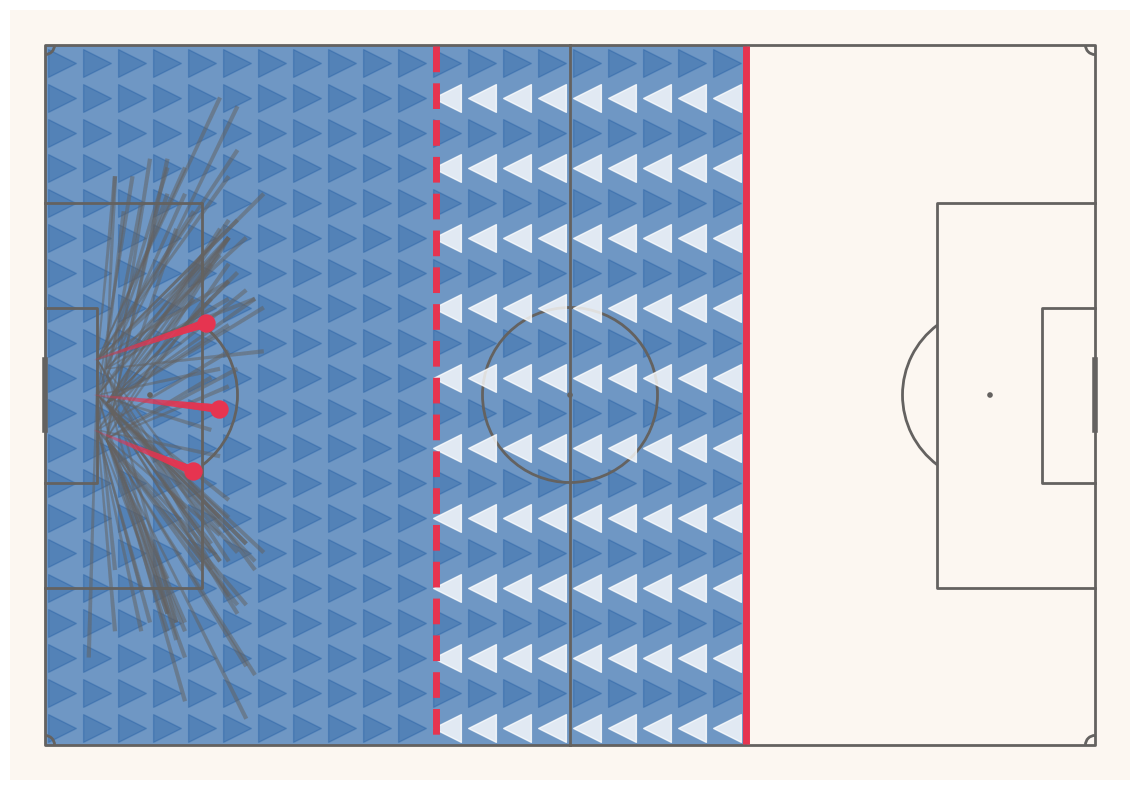

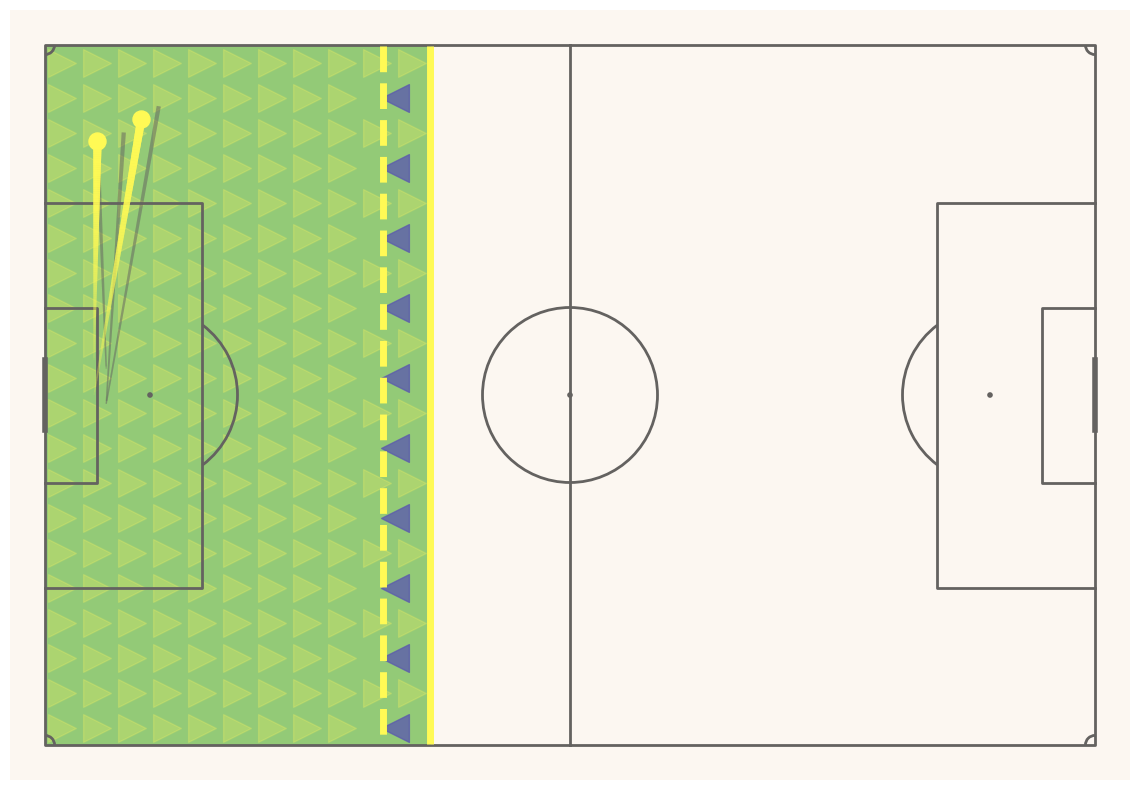

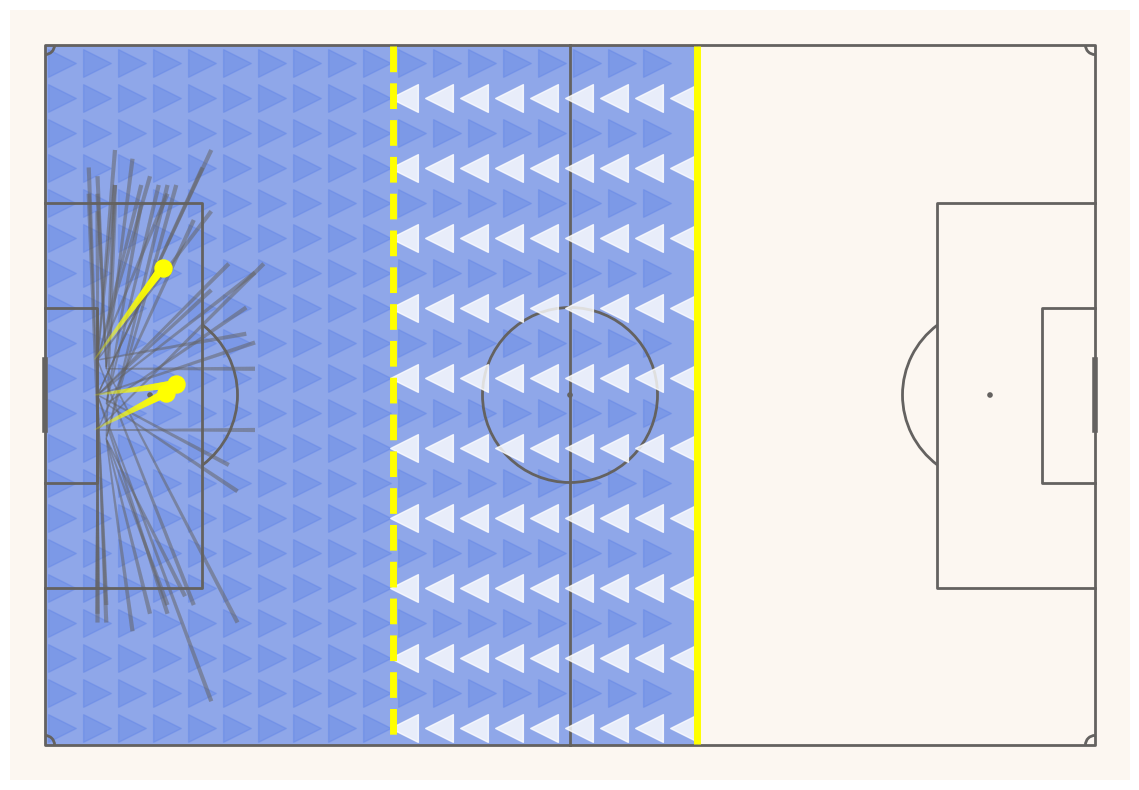

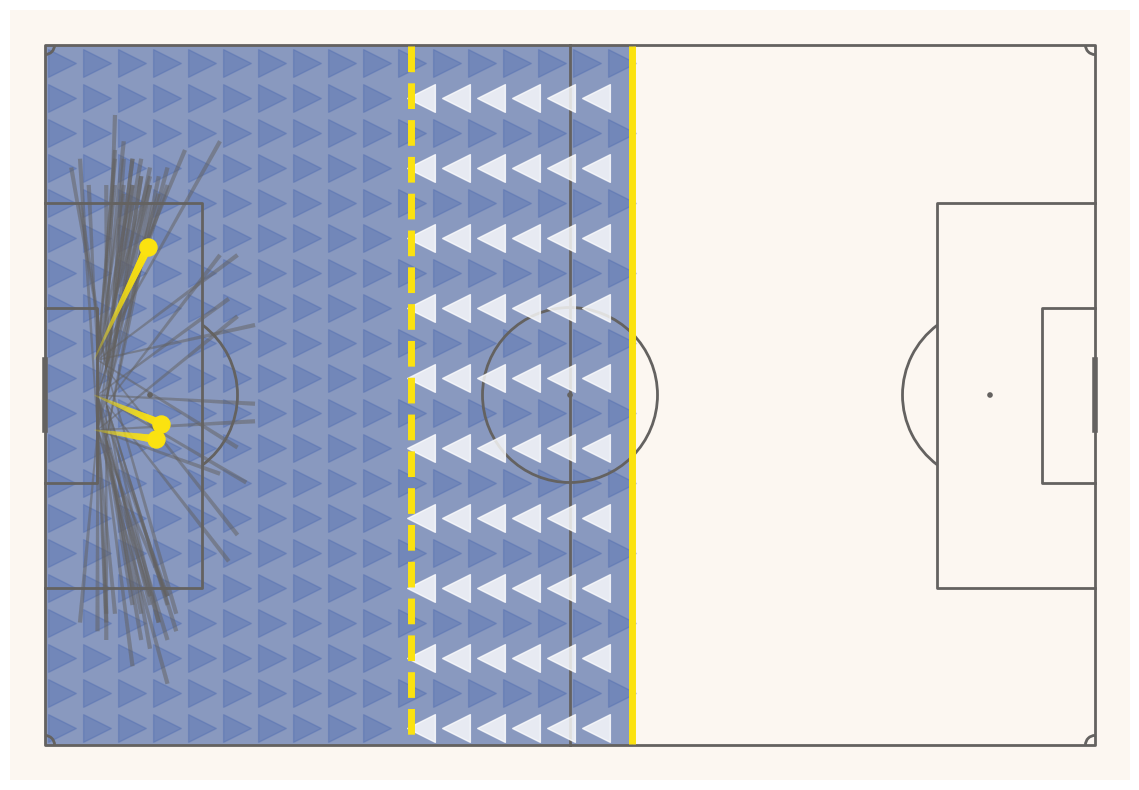

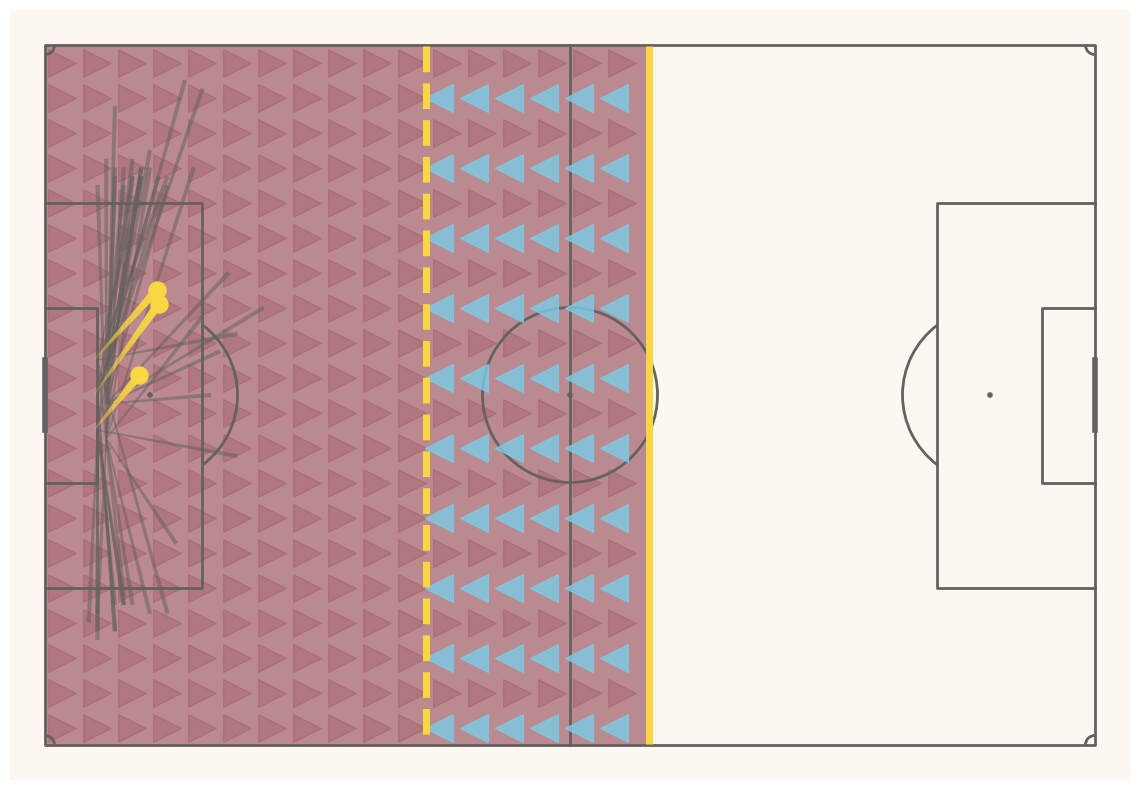

In [203]:
for team in ssn1819:
    season = '1819'
    short_pass_map(team,season)
    #long_pass_map(team,season)
    #short_network_pitch(team,season)
    #long_network_pitch(team,season)

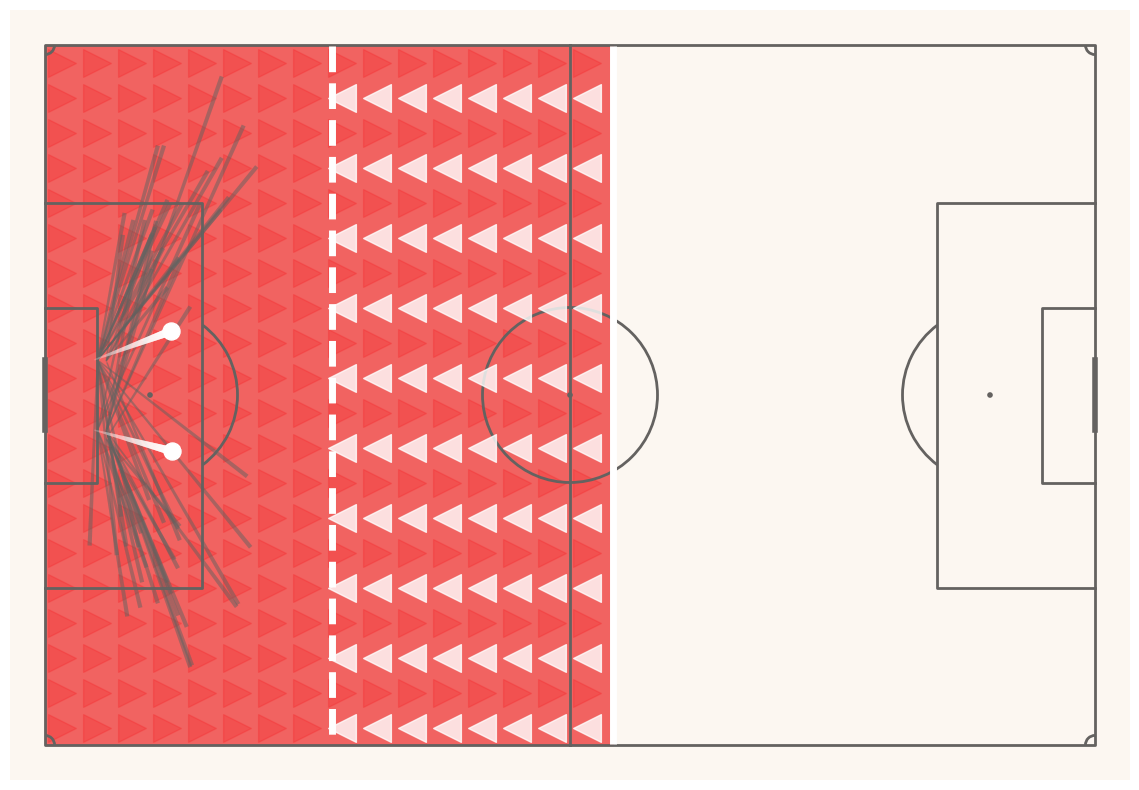

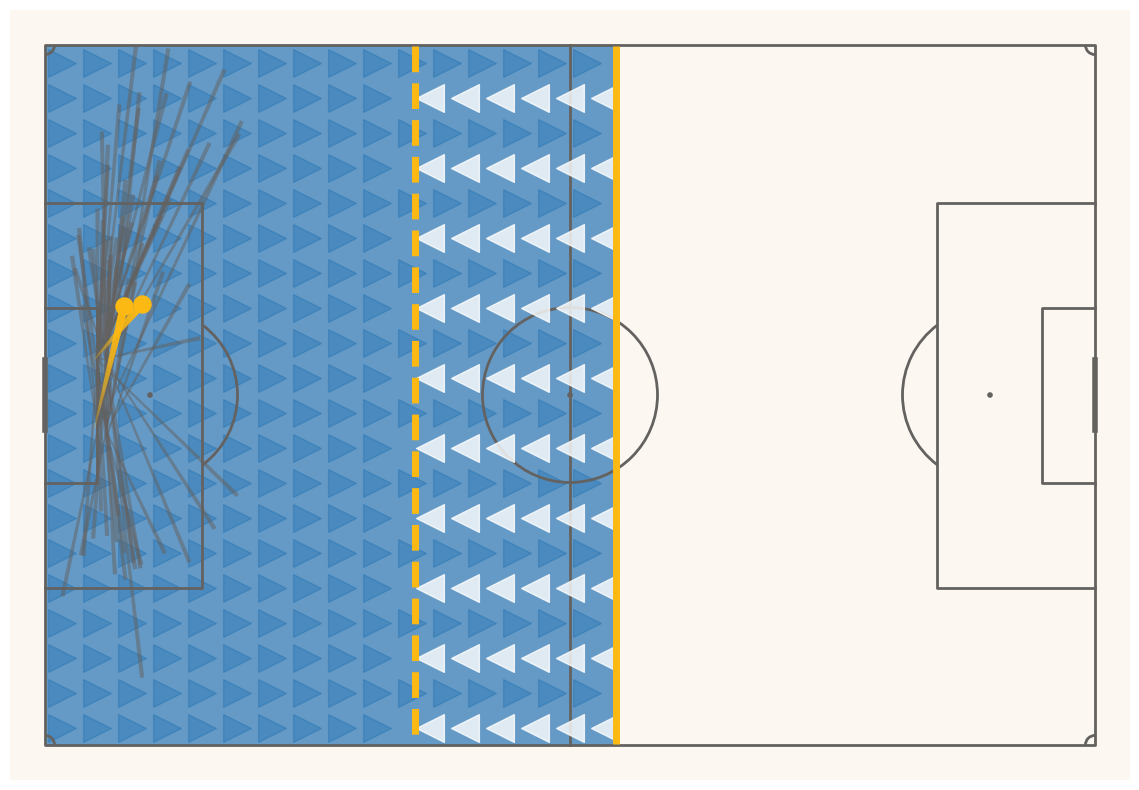

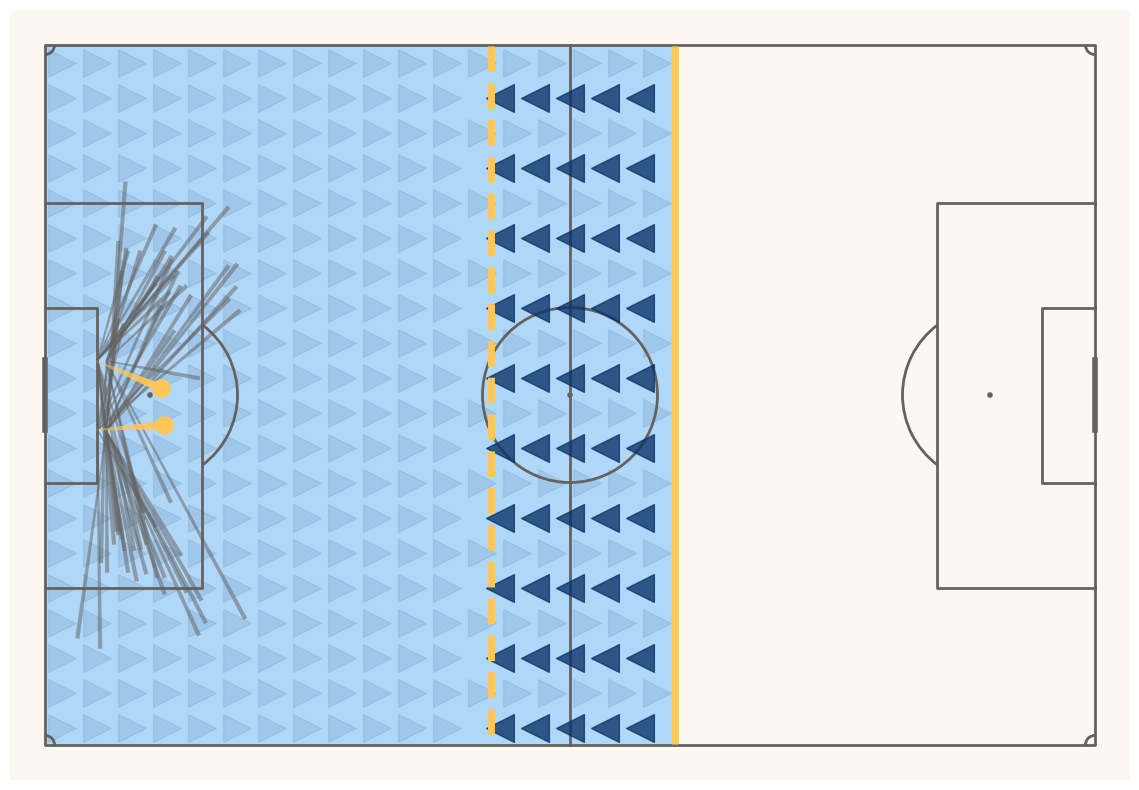

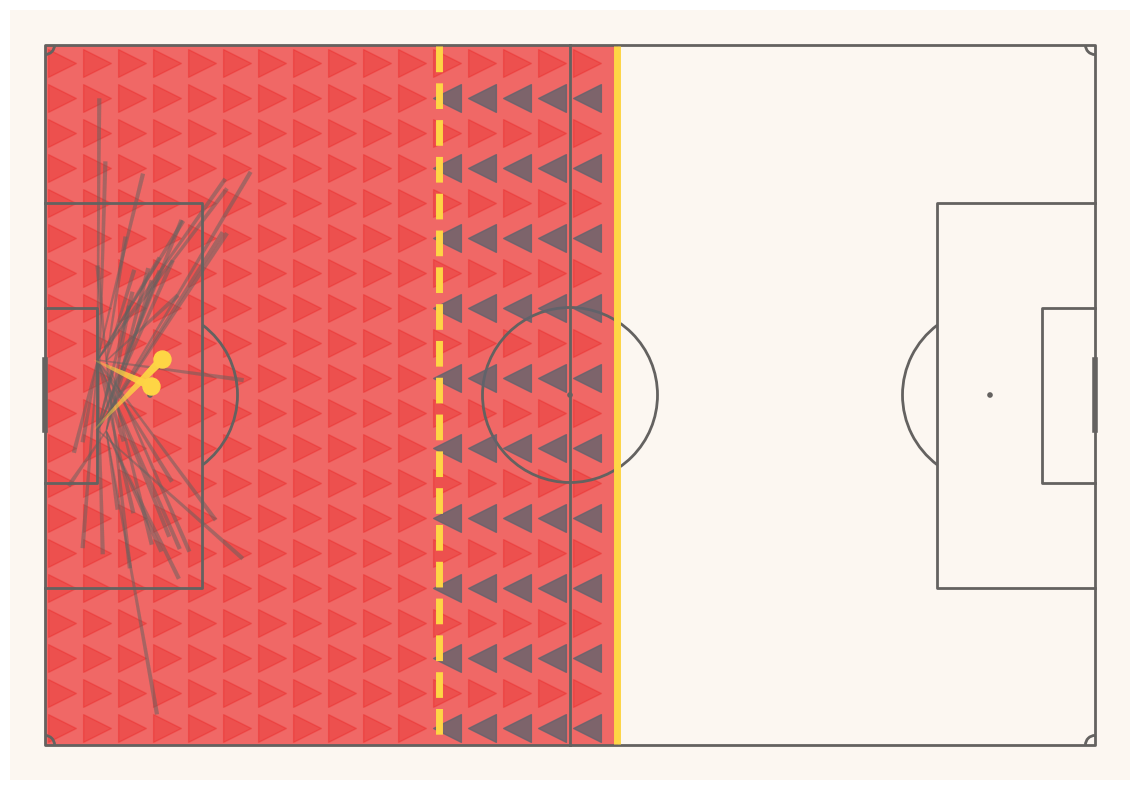

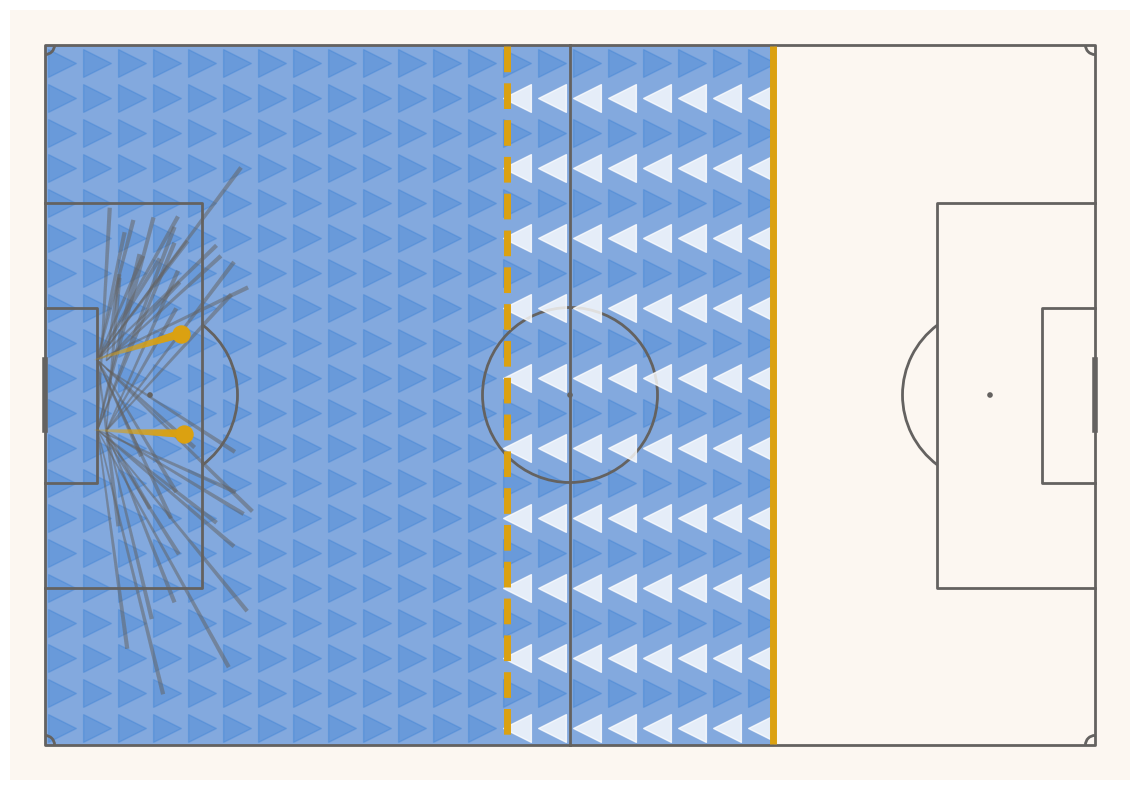

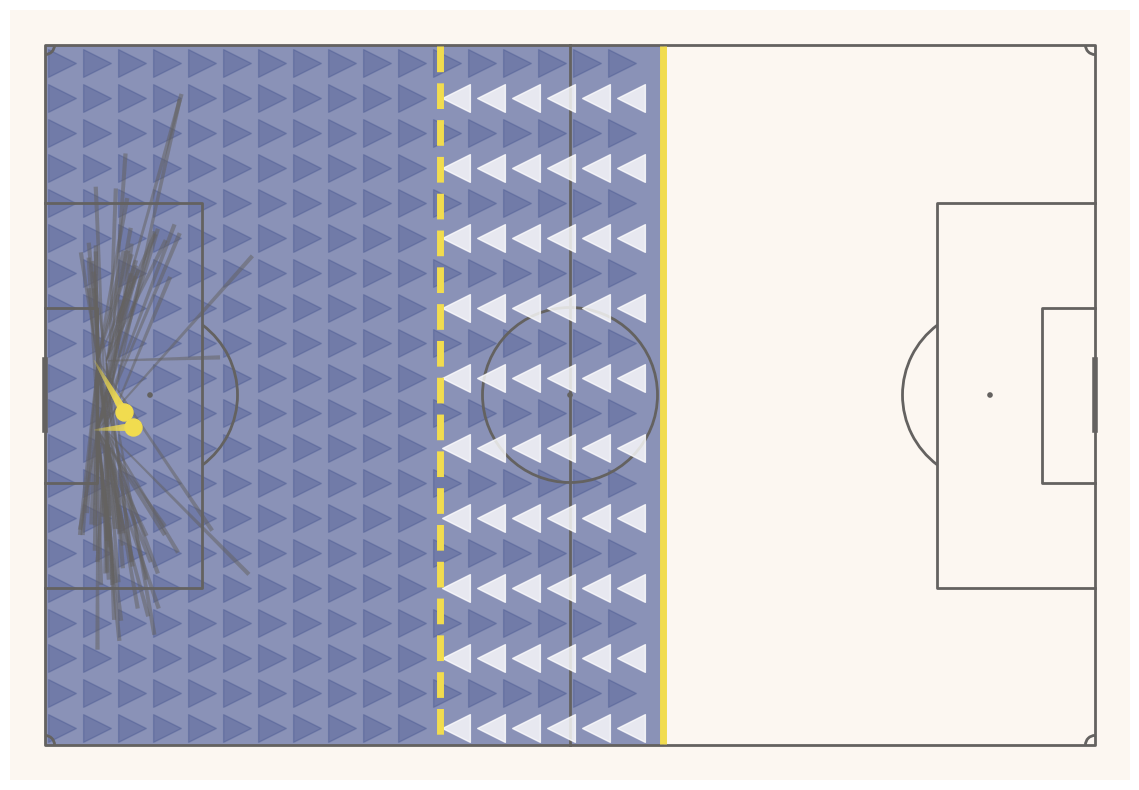

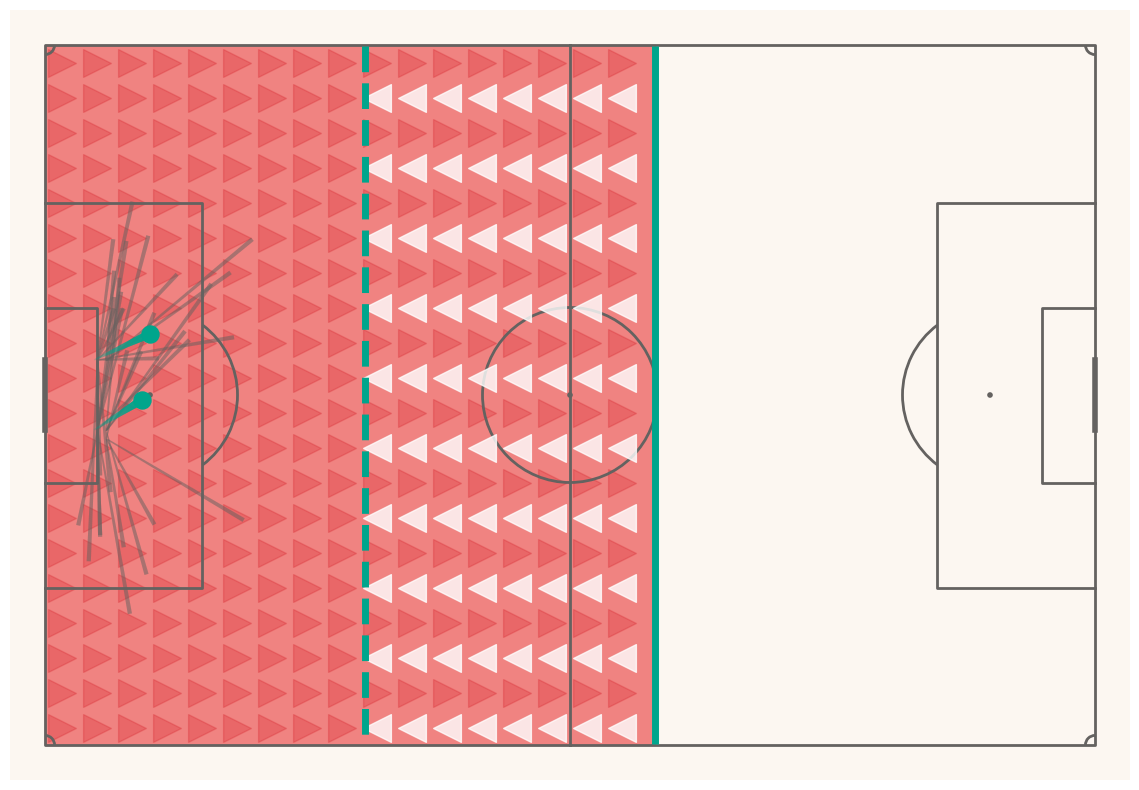

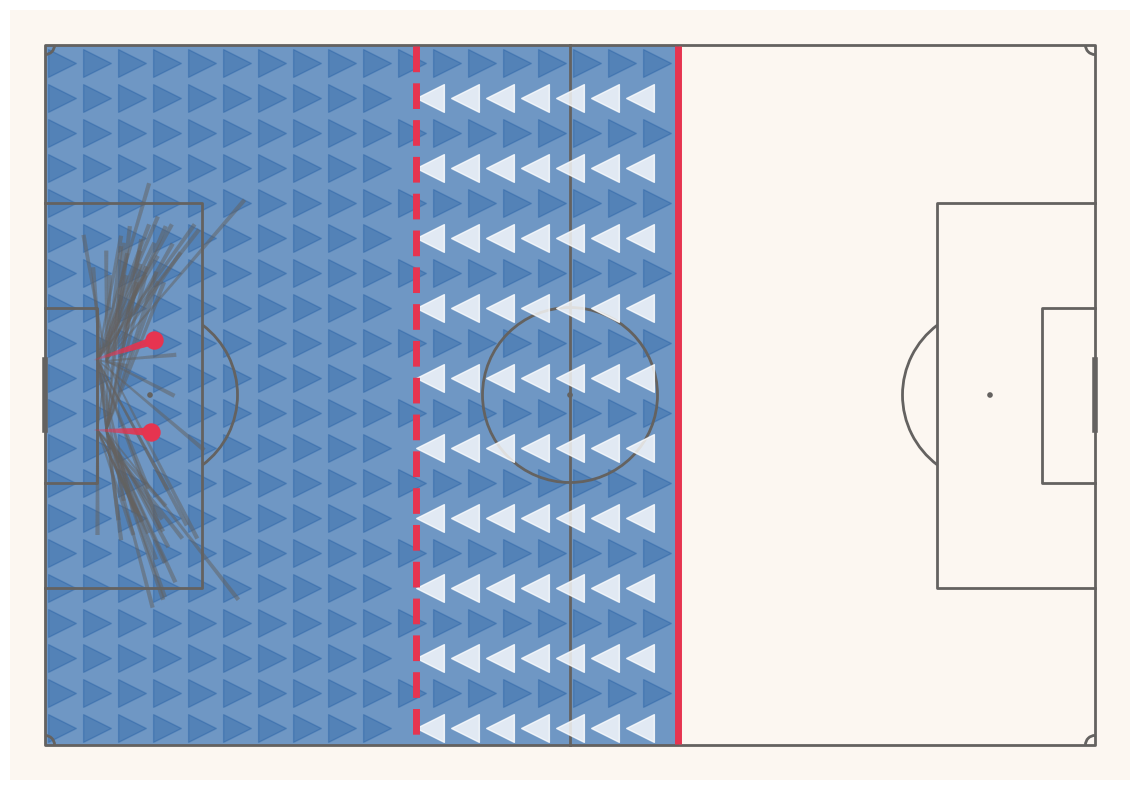

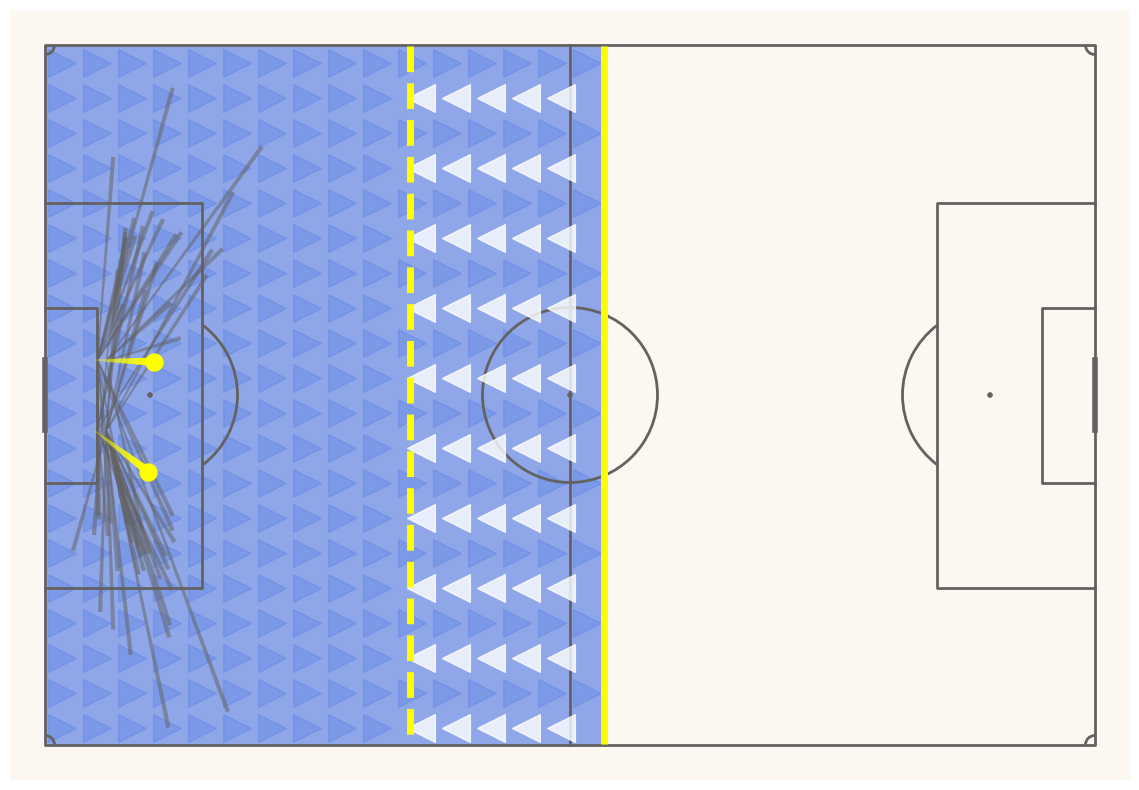

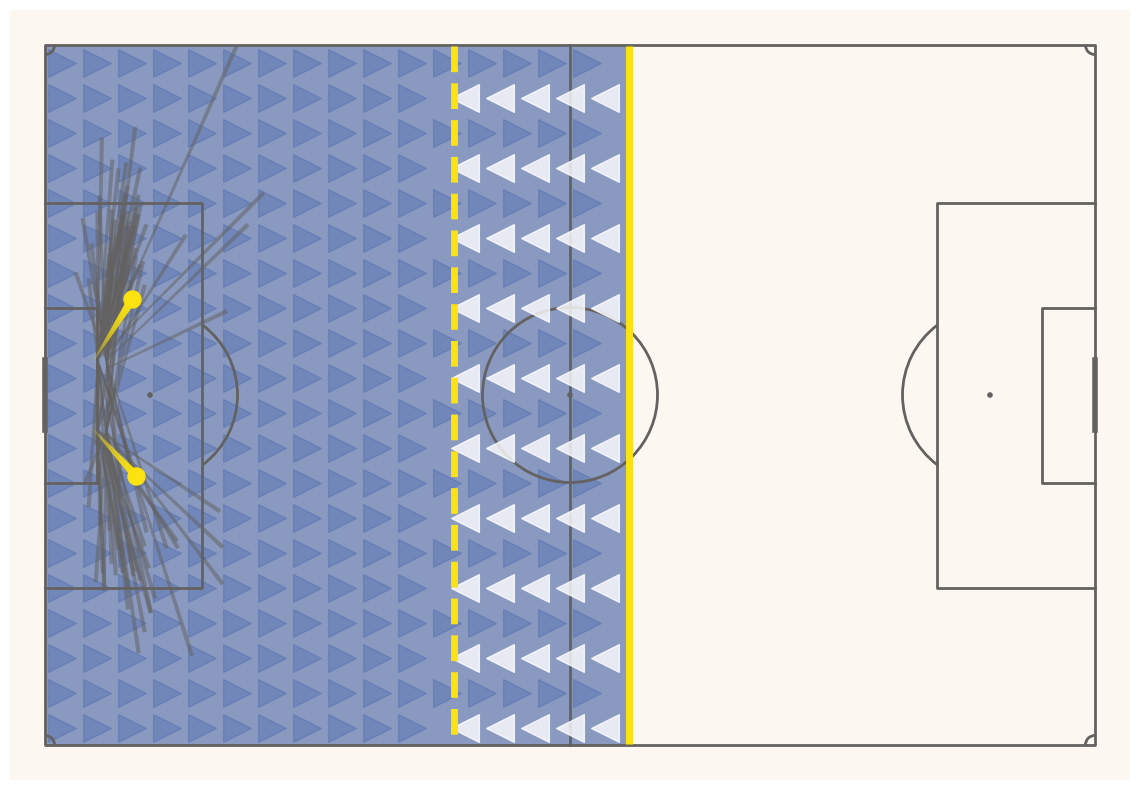

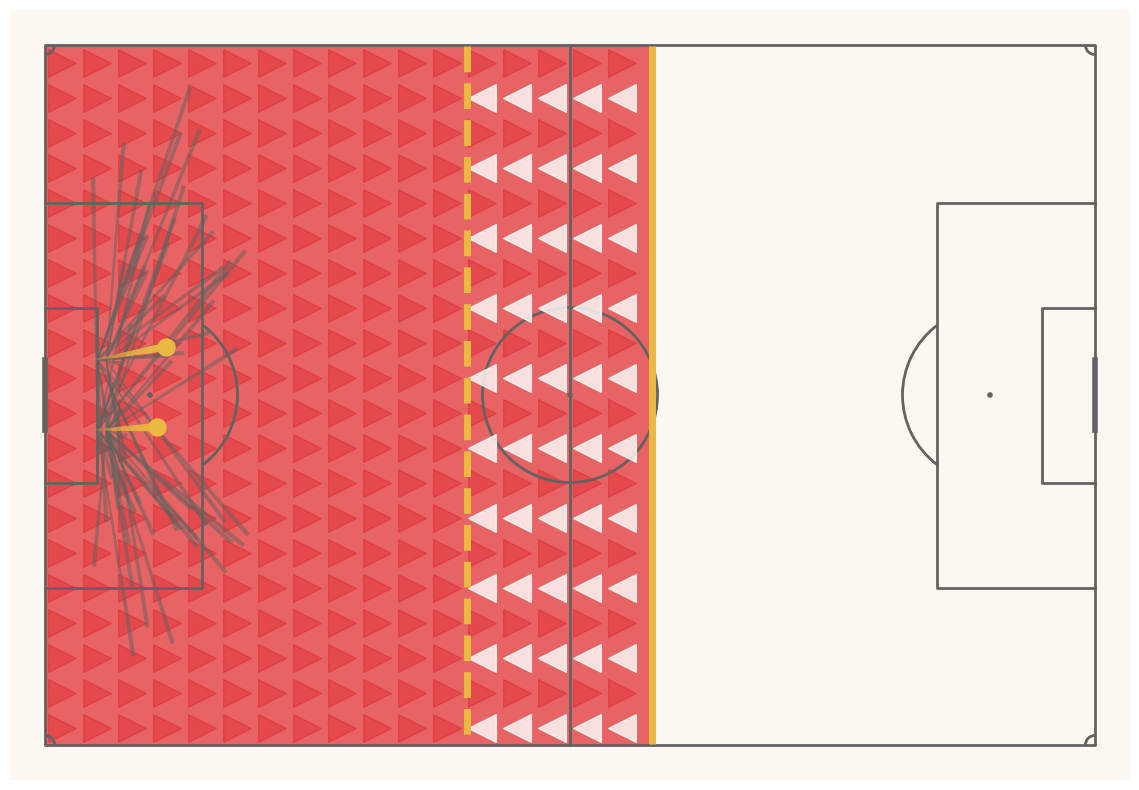

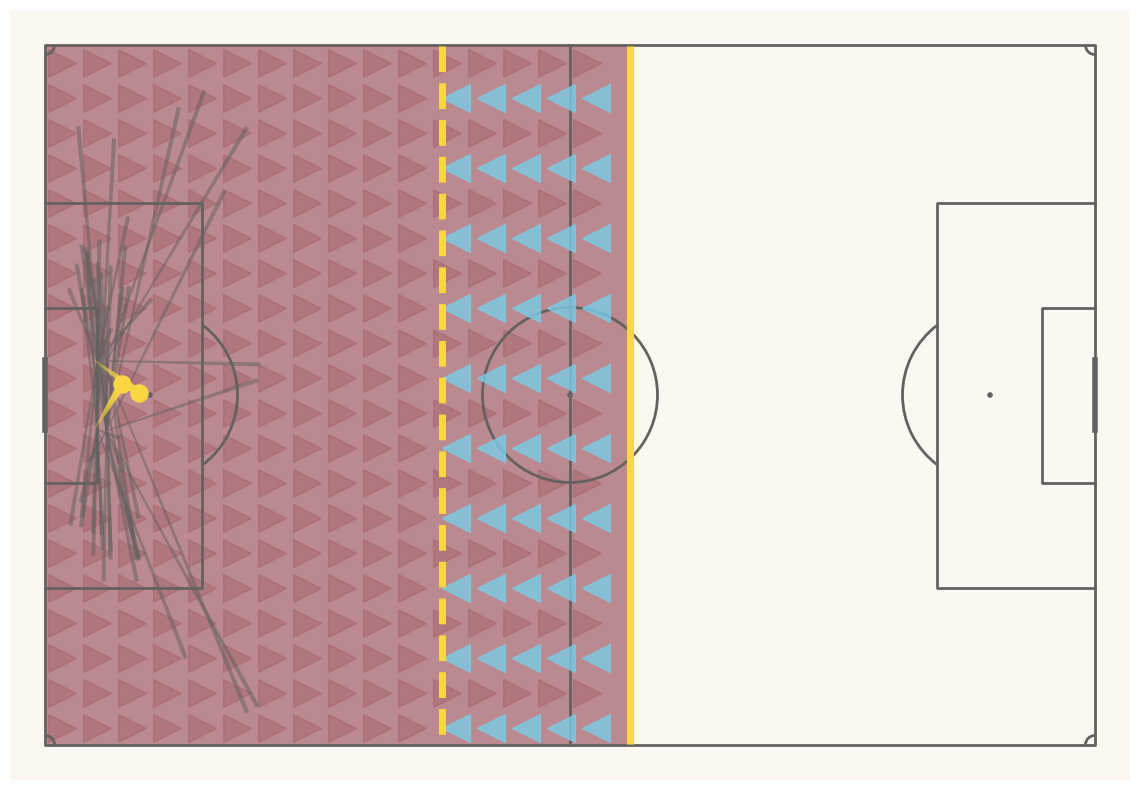

In [204]:
for team in ssn1920:
    season = '1920'
    short_pass_map(team,season)
    #long_pass_map(team,season)
    #short_network_pitch(team,season)
    #long_network_pitch(team,season)

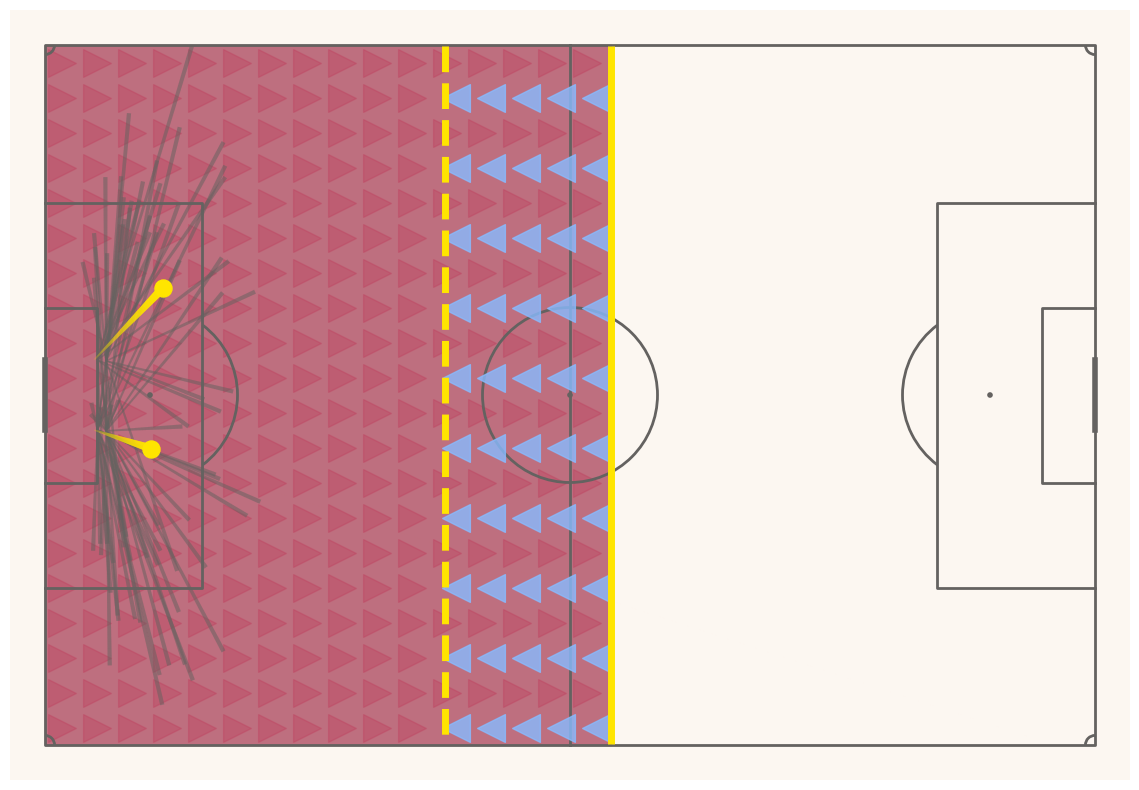

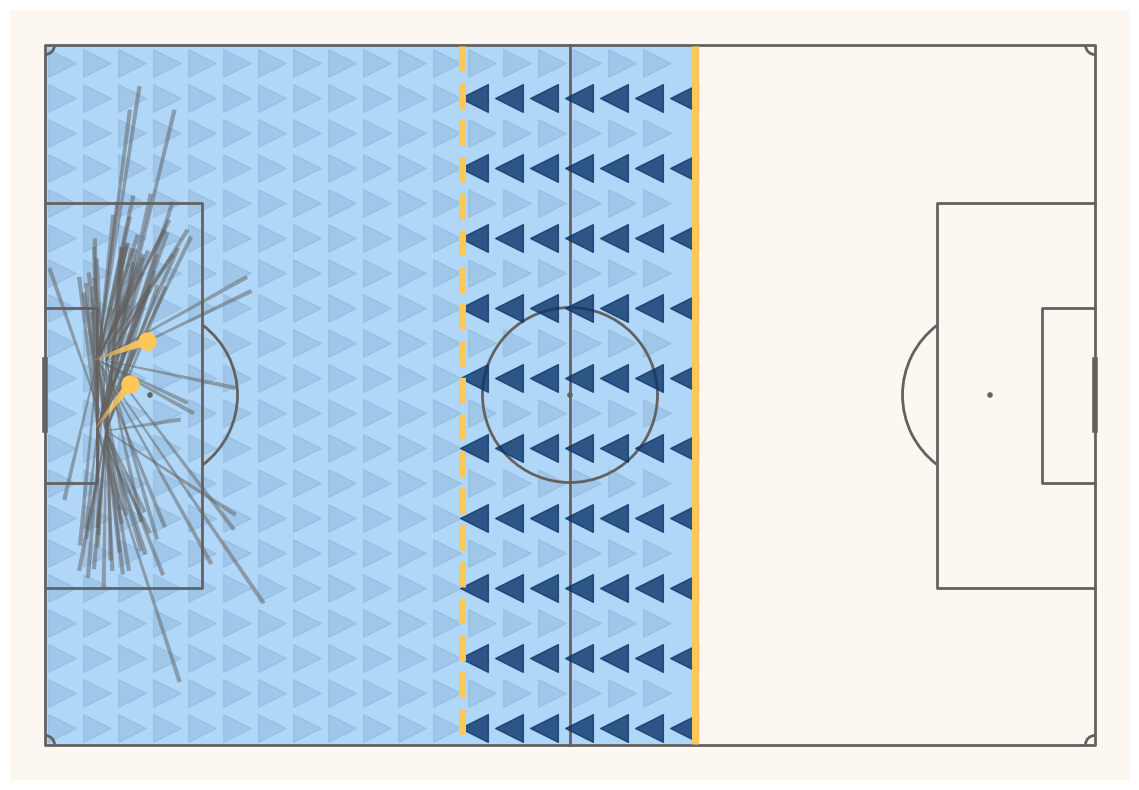

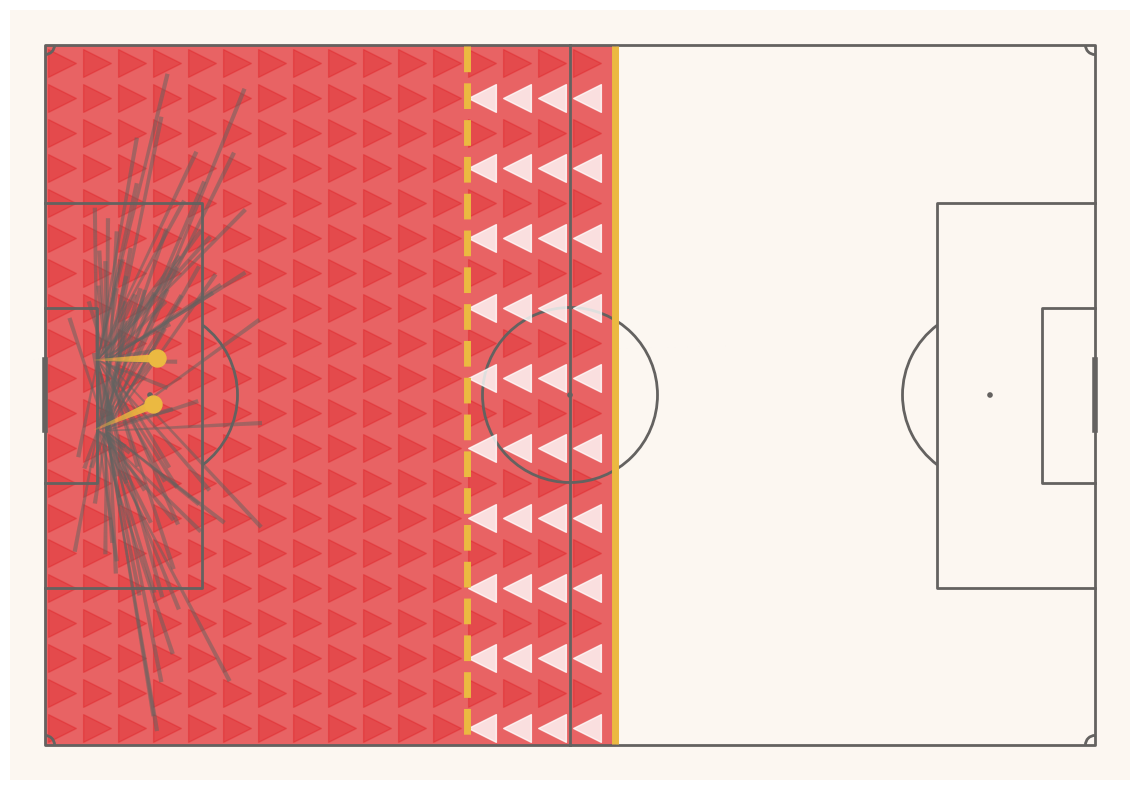

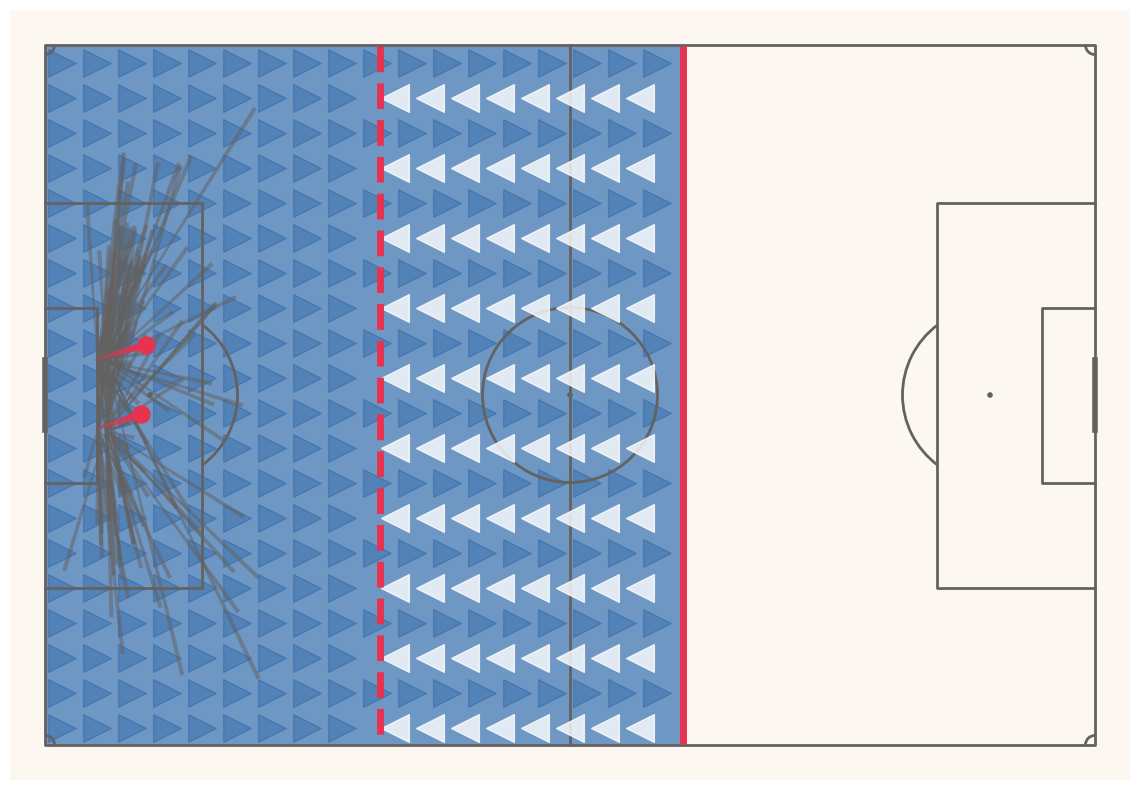

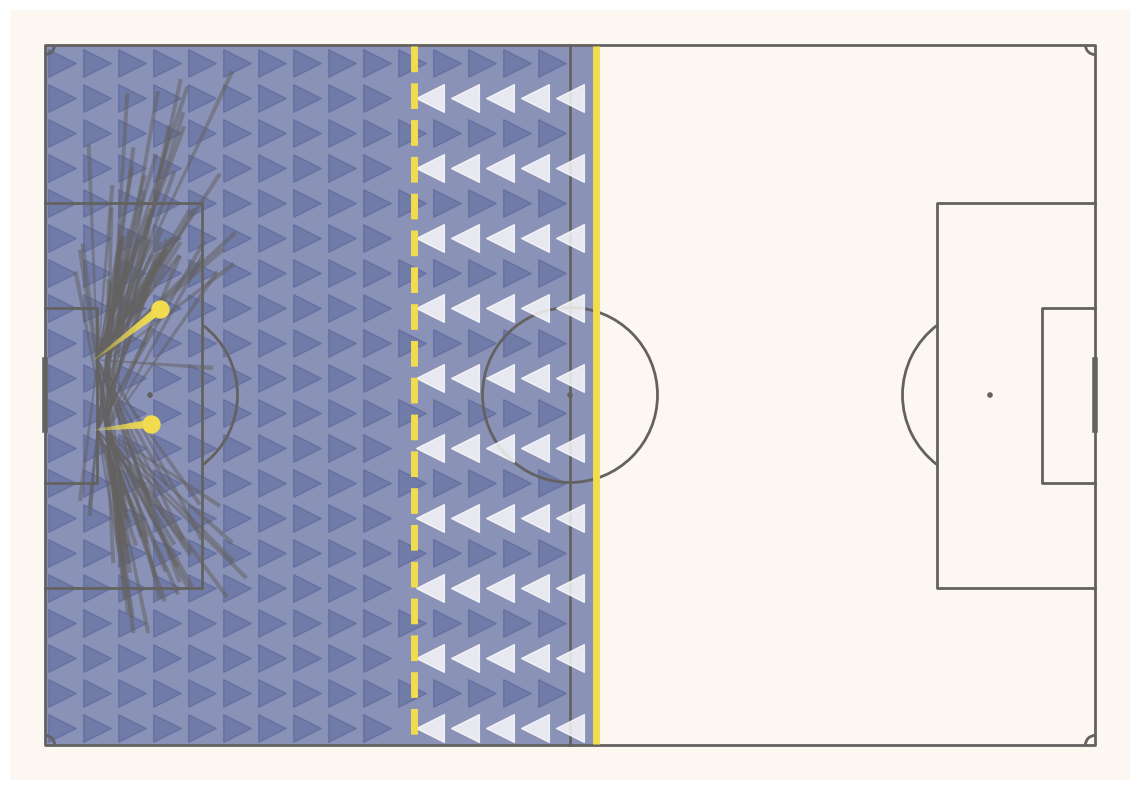

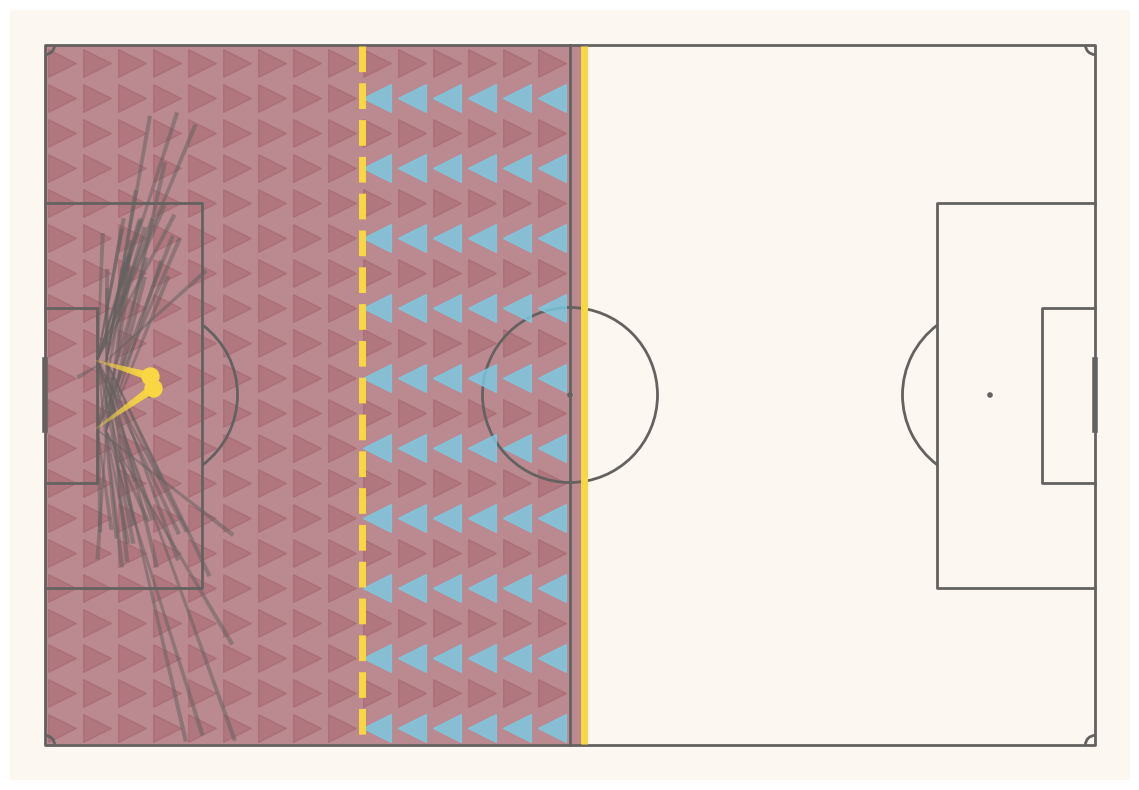

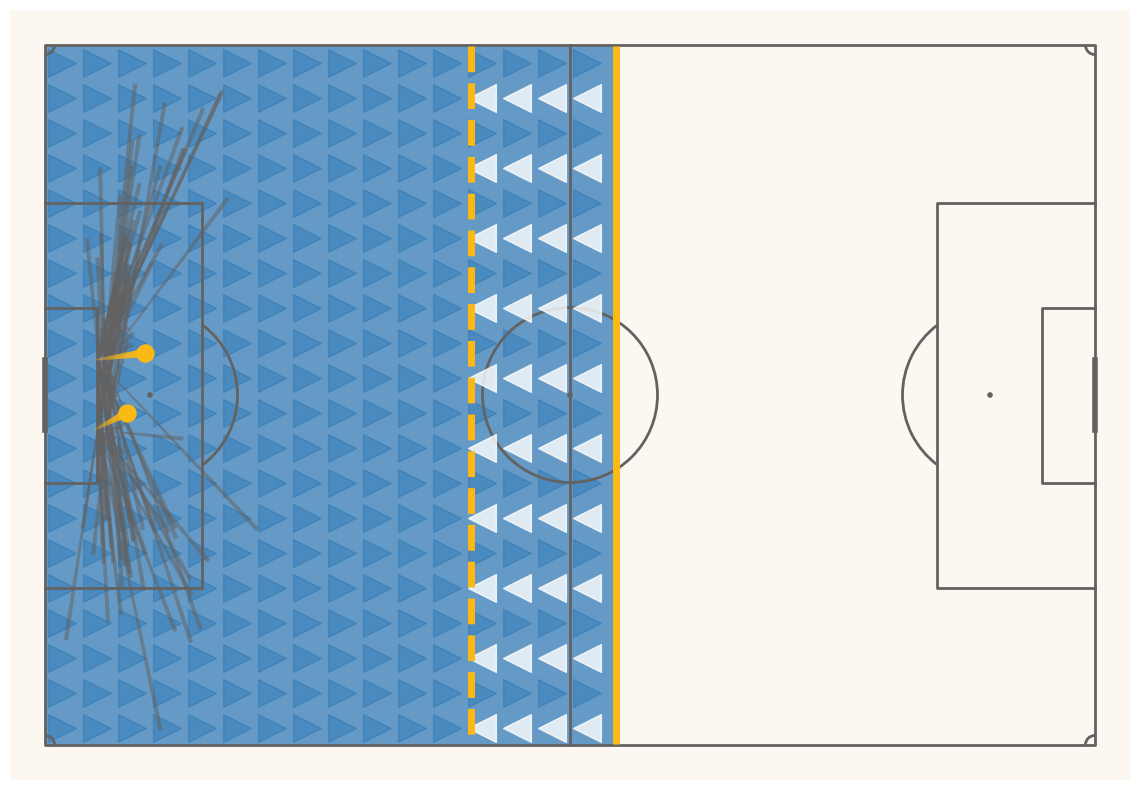

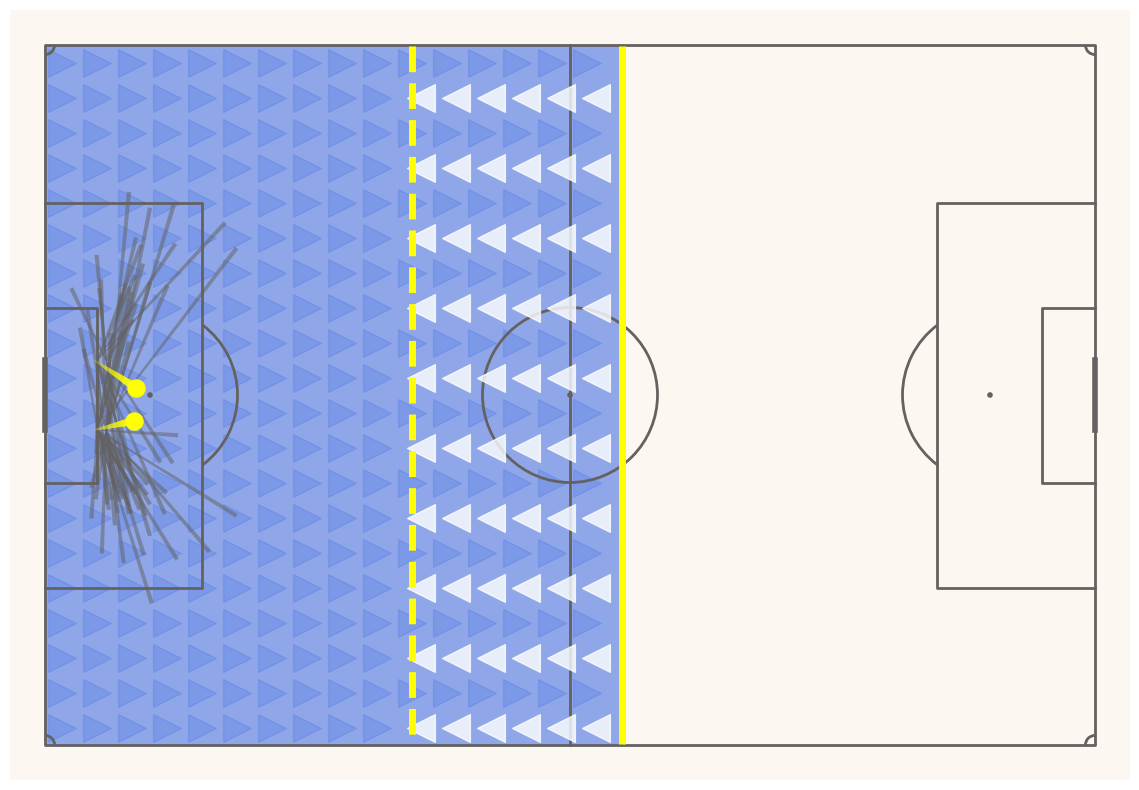

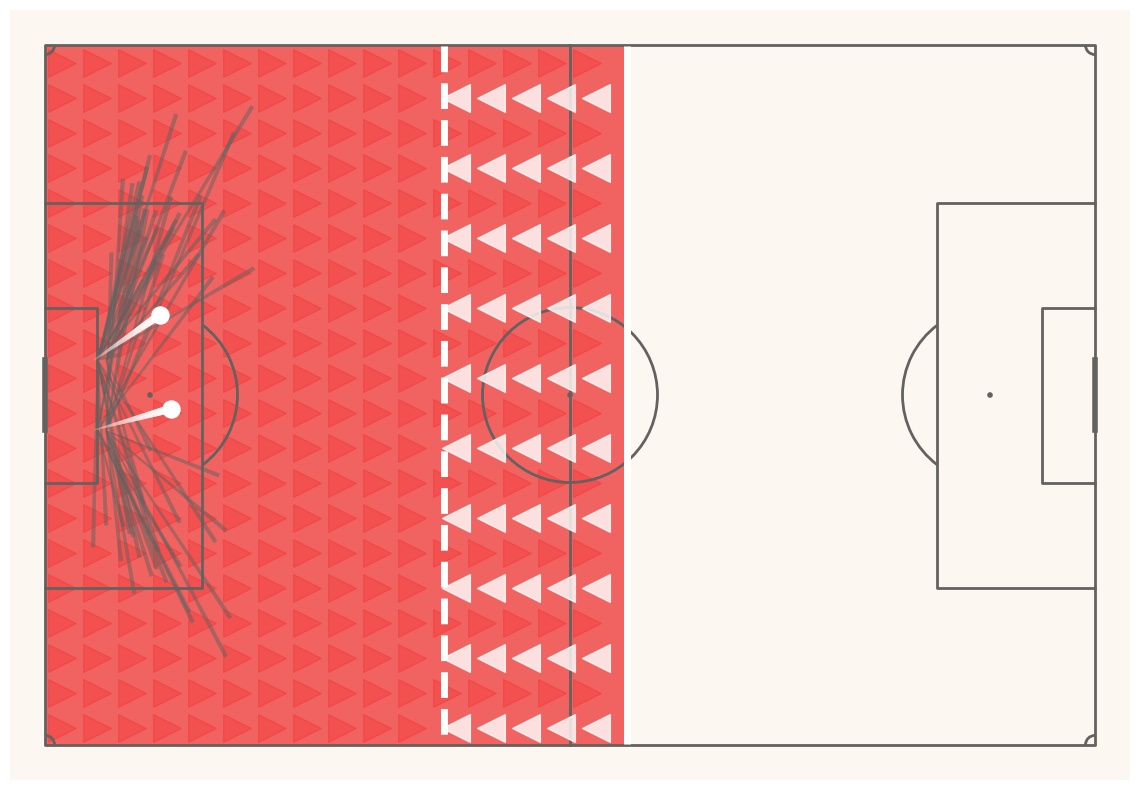

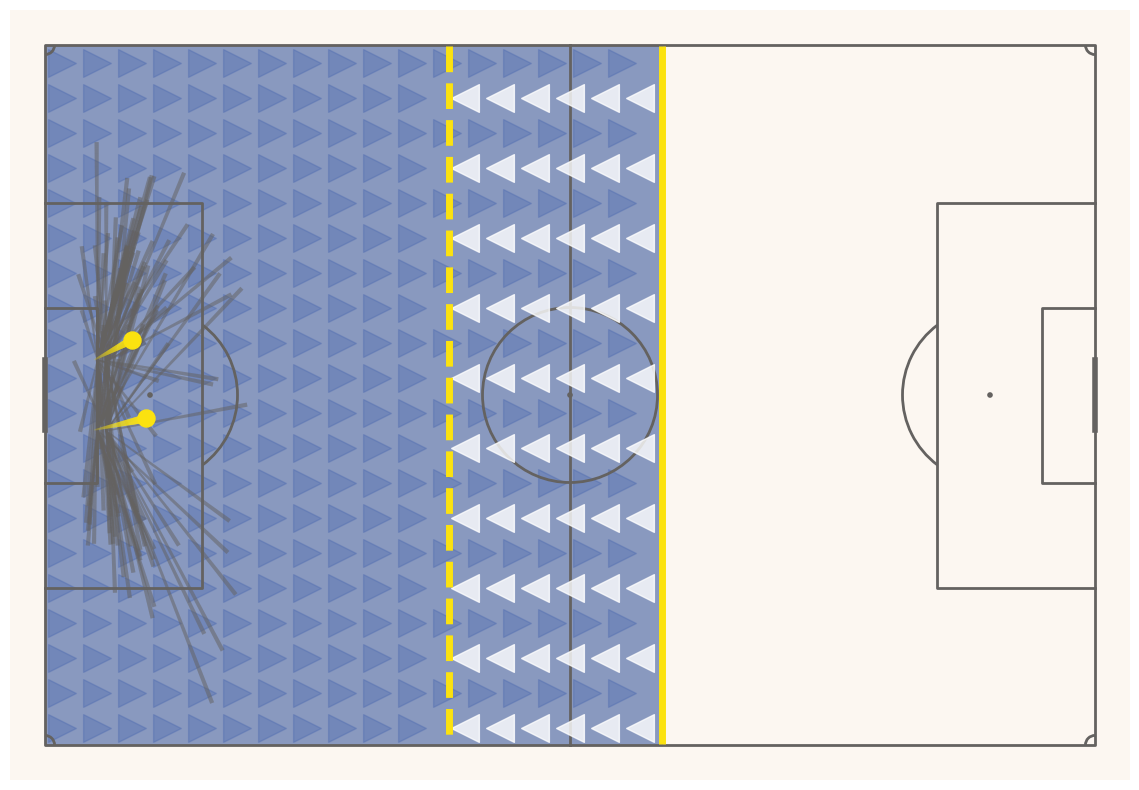

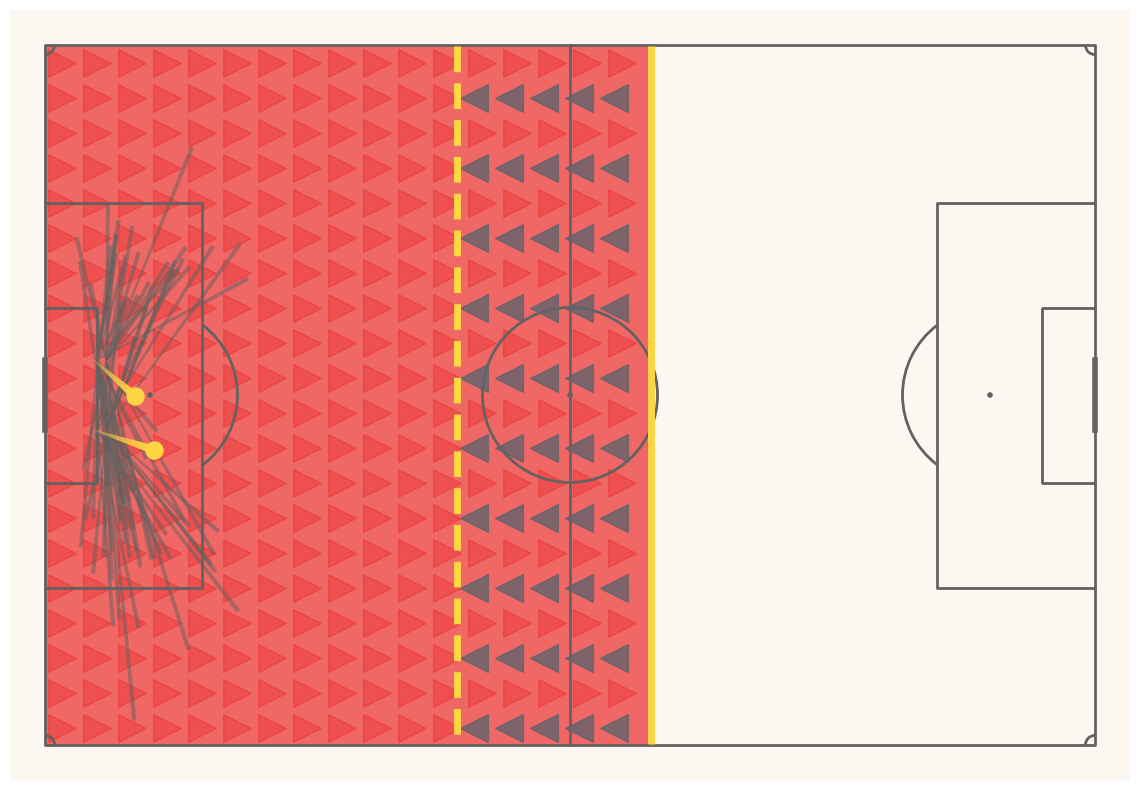

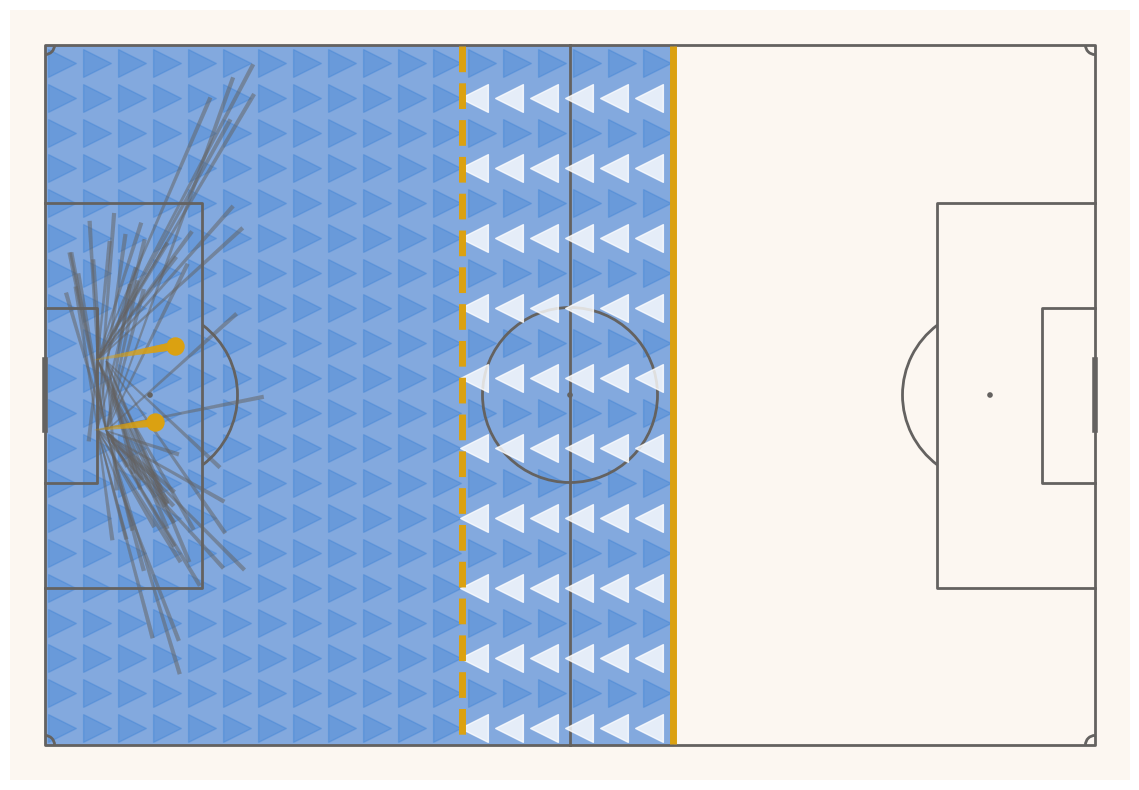

In [207]:
for team in ssn2021:
    season = '2021'
    short_pass_map(team,season)
    #long_pass_map(team,season)
    #short_network_pitch(team,season)
    #long_network_pitch(team,season)

In [ ]:
 'Birmingham City WFC',
 'Everton LFC',
 'Arsenal WFC',
 'West Ham United LFC'

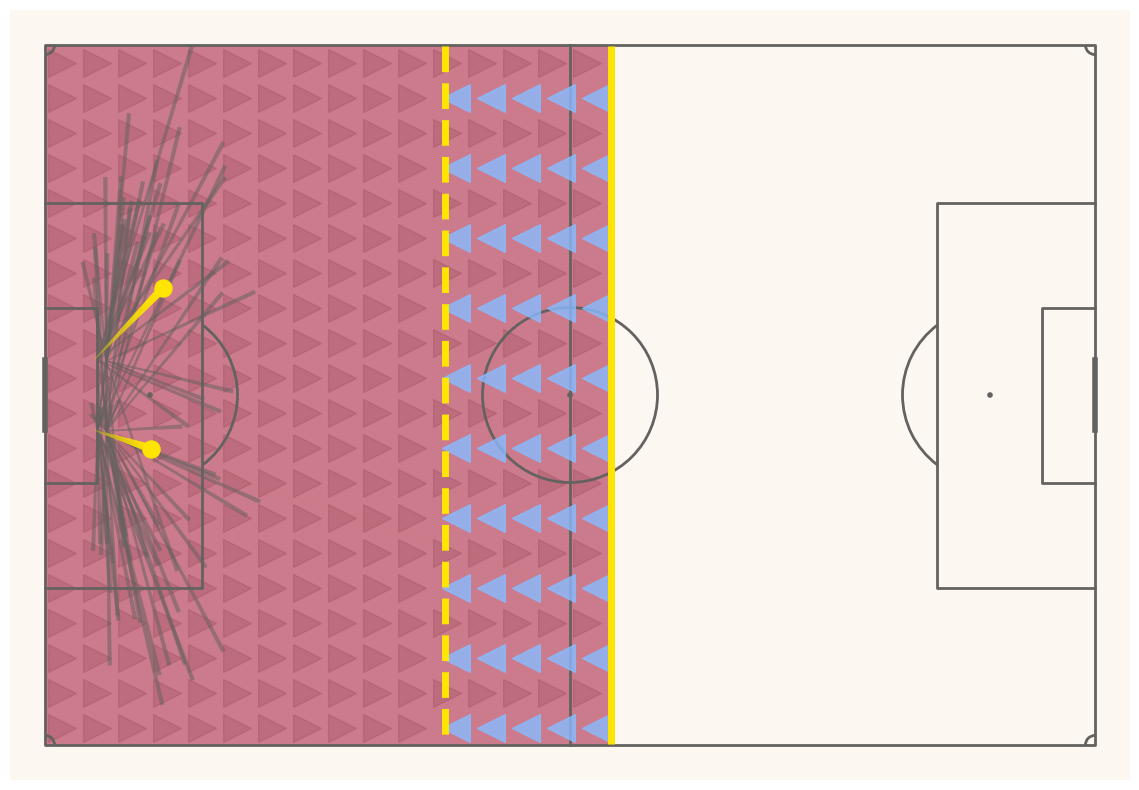

In [213]:
short_pass_map('Aston Villa','2021')

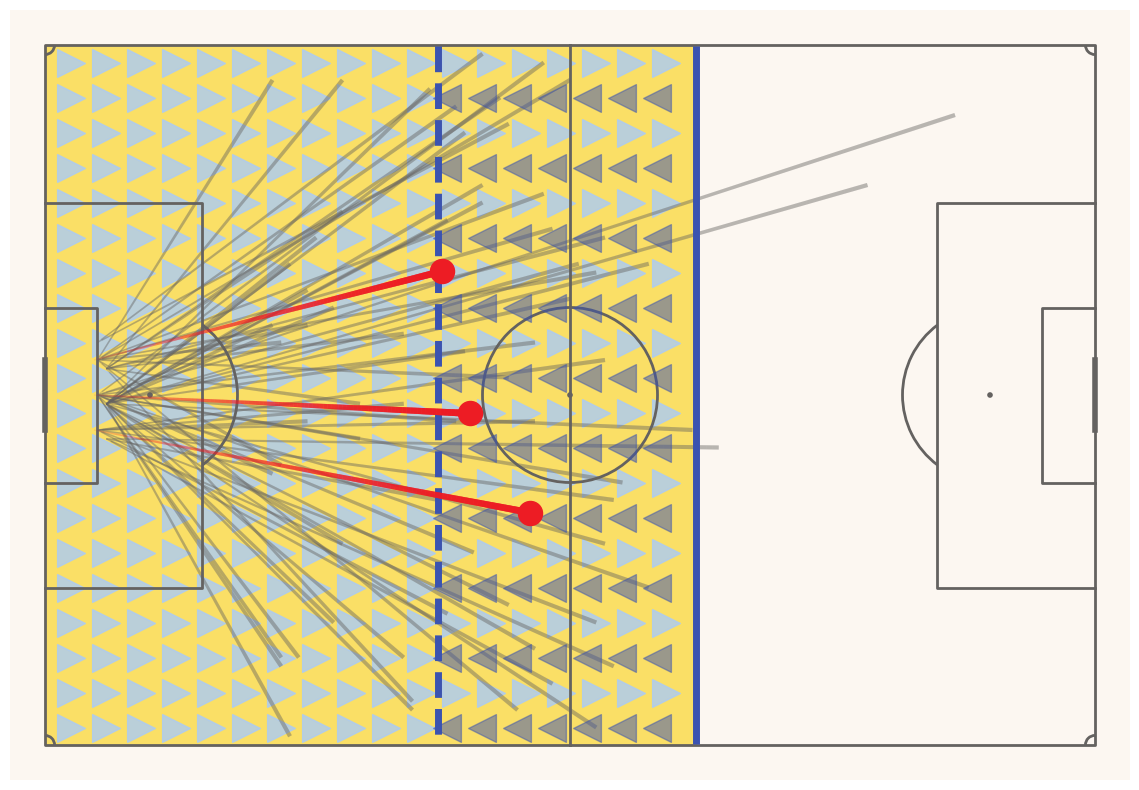

In [196]:
long_pass_map('Chelsea FCW','1819')

In [ ]:
short_network_pitch('Yeovil Town LFC','1819')

In [ ]:
long_network_pitch('Yeovil Town LFC','1819')

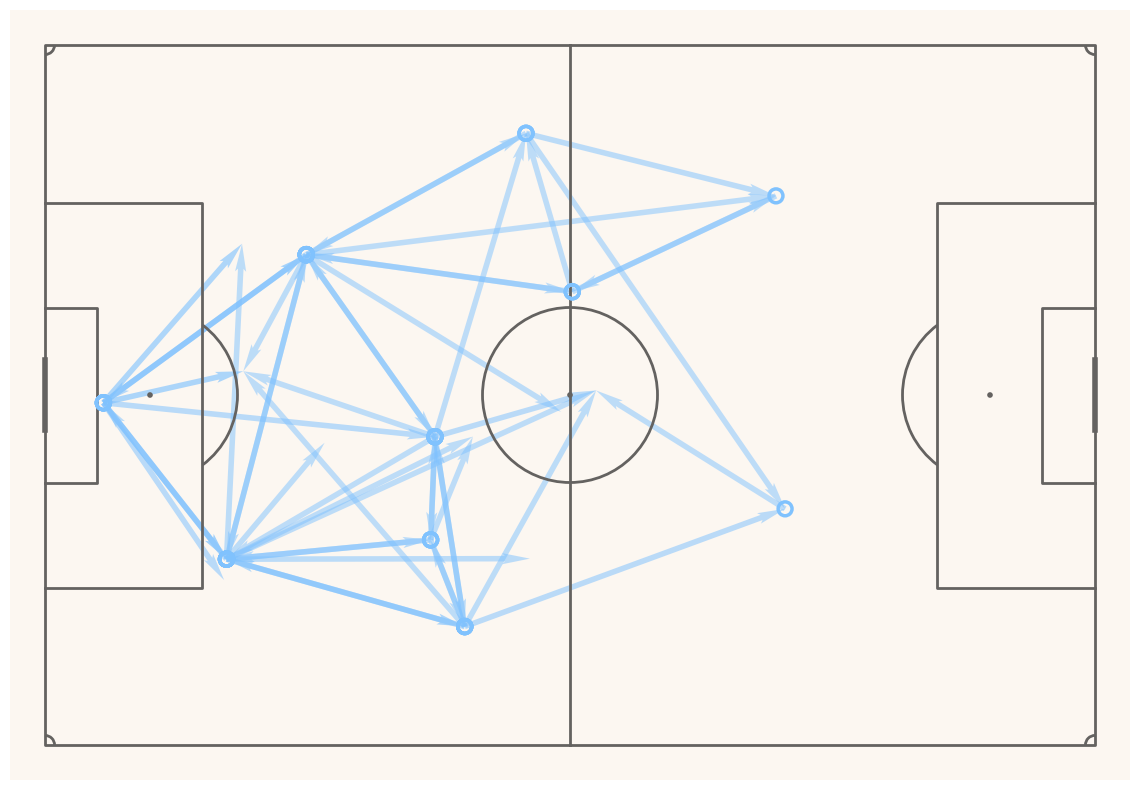

In [123]:
short_network_pitch('Manchester City WFC','2021')

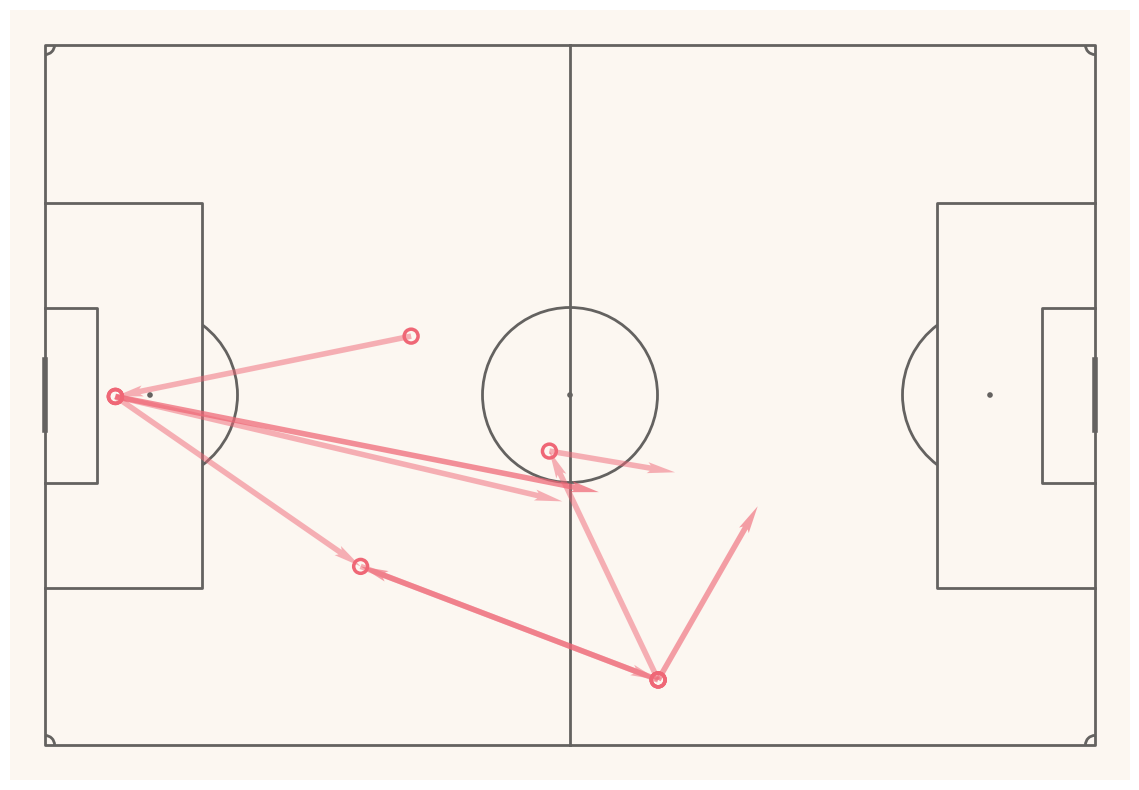

In [146]:
long_network_pitch('Everton LFC','2021')